In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
TCGA = pd.read_csv("TCGA_mutations.txt", sep="\t")
print(TCGA.shape[0])
TCGA.head()

587561


,GENE_ID,AA_wild,AA_mut,MUT_POS,Consequence,Polyphen_imp,SIFT_imp,VEP_imp
0,ENSG00000256394,F,V,266,missense_variant,benign,tolerated,MODERATE
1,ENSG00000128833,E,Q,1269,missense_variant,benign,tolerated,MODERATE
2,ENSG00000196600,H,N,33,missense_variant,benign,deleterious,MODERATE
3,ENSG00000095059,A,V,143,missense_variant,probably_damaging,deleterious,MODERATE
4,ENSG00000186994,E,Q,602,missense_variant,benign,tolerated,MODERATE


In [3]:
mapping = pd.read_csv("Ensembl_UniProt_mapping.txt", sep="\t")
mapping.head()

,Gene stable ID,UniProtKB/Swiss-Prot ID
0,ENSG00000198888,P03886
1,ENSG00000198763,P03891
2,ENSG00000198804,P00395
3,ENSG00000198712,P00403
4,ENSG00000228253,P03928


In [4]:
mapping.rename({"Gene stable ID": "GENE_ID", "UniProtKB/Swiss-Prot ID": "ACC_ID"}, axis=1, inplace=True)
TCGA = pd.merge(TCGA, mapping, how="inner", on=["GENE_ID"])
print(TCGA.shape[0])
TCGA.head()

1031543


,GENE_ID,AA_wild,AA_mut,MUT_POS,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,ACC_ID
0,ENSG00000256394,F,V,266,missense_variant,benign,tolerated,MODERATE,Q9NY37
1,ENSG00000256394,H,Q,140,missense_variant,benign,tolerated,MODERATE,Q9NY37
2,ENSG00000256394,R,I,220,missense_variant,benign,deleterious,MODERATE,Q9NY37
3,ENSG00000256394,S,Y,44,missense_variant,possibly_damaging,tolerated,MODERATE,Q9NY37
4,ENSG00000256394,S,Y,376,missense_variant,possibly_damaging,deleterious,MODERATE,Q9NY37


In [5]:
print(TCGA["ACC_ID"].nunique())
print(TCGA.groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])

17981
558727


In [6]:
TCGA["Polyphen_imp"].value_counts()

benign               464581
probably_damaging    376216
possibly_damaging    189731
unknown                 567
Name: Polyphen_imp, dtype: int64

In [7]:
print("Benign variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="benign"].shape[0]))
print("Proteins having benign variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="benign"]["ACC_ID"].nunique()))
print("Sites having benign variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="benign"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("Probably damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="probably_damaging"].shape[0]))
print("Proteins having Probably damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="probably_damaging"]["ACC_ID"].nunique()))
print("Sites having Probably damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="probably_damaging"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("Possibly damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="possibly_damaging"].shape[0]))
print("Proteins having Possibly damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="possibly_damaging"]["ACC_ID"].nunique()))
print("Sites having Possibly damaging variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="possibly_damaging"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("unknown variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="unknown"].shape[0]))
print("Proteins having unknown variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="unknown"]["ACC_ID"].nunique()))
print("Sites having unknown variants: {}".format(TCGA[TCGA["Polyphen_imp"]=="unknown"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))

Benign variants: 464581
Proteins having benign variants: 17620
Sites having benign variants: 256663
Probably damaging variants: 376216
Proteins having Probably damaging variants: 17209
Sites having Probably damaging variants: 202521
Possibly damaging variants: 189731
Proteins having Possibly damaging variants: 16382
Sites having Possibly damaging variants: 105610
unknown variants: 567
Proteins having unknown variants: 86
Sites having unknown variants: 286


In [8]:
TCGA_STY = TCGA[(TCGA["AA_wild"]=="S")|(TCGA["AA_wild"]=="T")|(TCGA["AA_wild"]=="Y")]

In [9]:
print("Benign variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="benign"].shape[0]))
print("Proteins having benign variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="benign"]["ACC_ID"].nunique()))
print("Sites having benign variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="benign"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("Probably damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="probably_damaging"].shape[0]))
print("Proteins having Probably damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="probably_damaging"]["ACC_ID"].nunique()))
print("Sites having Probably damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="probably_damaging"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("Possibly damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="possibly_damaging"].shape[0]))
print("Proteins having Possibly damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="possibly_damaging"]["ACC_ID"].nunique()))
print("Sites having Possibly damaging variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="possibly_damaging"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))
print("unknown variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="unknown"].shape[0]))
print("Proteins having unknown variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="unknown"]["ACC_ID"].nunique()))
print("Sites having unknown variants: {}".format(TCGA_STY[TCGA_STY["Polyphen_imp"]=="unknown"].groupby(["ACC_ID", "MUT_POS"], as_index=False).agg({"Consequence": "first"}).shape[0]))

Benign variants: 70510
Proteins having benign variants: 12680
Sites having benign variants: 39315
Probably damaging variants: 49544
Proteins having Probably damaging variants: 10732
Sites having Probably damaging variants: 27277
Possibly damaging variants: 31652
Proteins having Possibly damaging variants: 8795
Sites having Possibly damaging variants: 17614
unknown variants: 101
Proteins having unknown variants: 23
Sites having unknown variants: 53


In [10]:
data_site = pd.read_csv("site_data", sep="\t")
print(data_site.shape[0])
data_site.head()

23903


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Out of the 5 855 proteins in our dataset, 5 094 are present in the humsavar dataset. 21 869 mutation sites have been identified on these proteins. The majority of these sites are annotated aas benign (18 994), while 17 480 are annotated as probably damaging and 15 243 as possibly damaging. 68 are annotated as US. The majority of these sites are annotated with more than one type of mutation.

In [11]:
mutated_proteins = pd.merge(data_site, TCGA, how="inner", on="ACC_ID")
print(mutated_proteins["ACC_ID"].nunique())
print(mutated_proteins.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(mutated_proteins.groupby(["ACC_ID", "UP_POS", "Polyphen_imp"], as_index=False).agg({"Consequence": "first"})["Polyphen_imp"].value_counts())
print(mutated_proteins.shape[0])
print(mutated_proteins["Polyphen_imp"].value_counts())

5644
23269
benign               23045
probably_damaging    22923
possibly_damaging    22481
unknown                207
Name: Polyphen_imp, dtype: int64
1217411
benign               517084
probably_damaging    471250
possibly_damaging    227880
unknown                 927
Name: Polyphen_imp, dtype: int64


In [12]:
TCGA.rename({"MUT_POS": "UP_POS"},axis=1, inplace=True)
TCGA.dtypes # unlike the humsavar file, the column types here are ready for merge

GENE_ID         object
AA_wild         object
AA_mut          object
UP_POS           int64
Consequence     object
Polyphen_imp    object
SIFT_imp        object
VEP_imp         object
ACC_ID          object
dtype: object

881 proteins have mutations exactly on the modified position, for a 1072 sites. Most annotations point towards benign mutations.

In [13]:
mutated_sites = pd.merge(data_site, TCGA, how="inner", on=["ACC_ID", "UP_POS"])
print(mutated_sites["ACC_ID"].nunique())
print(mutated_sites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(mutated_sites.groupby(["ACC_ID", "UP_POS", "Polyphen_imp"], as_index=False).agg({"Consequence": "first"})["Polyphen_imp"].value_counts())
mutated_sites

881
1072
benign               501
probably_damaging    343
possibly_damaging    236
Name: Polyphen_imp, dtype: int64


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Urinary bladder,Urine,Total,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp
0,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,4,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE
1,A0FGR8,758,"Liver,Liver,Blood,Testis",S,0,0,1,0,0,0,...,0,0,3,ENSG00000117868,S,L,missense_variant,probably_damaging,deleterious,MODERATE
2,A2RRP1,473,"Blood,Blood,Blood,Blood,Blood,Placenta,Placent...",S,0,0,1,0,0,0,...,0,0,3,ENSG00000151779,S,F,missense_variant,possibly_damaging,deleterious,MODERATE
3,A4UGR9,3042,Skeletal muscle,S,0,0,0,0,0,0,...,0,0,1,ENSG00000163092,K,E,missense_variant,benign,deleterious,MODERATE
4,A5A3E0,733,"PBMC,Brain,Lymph node",S,0,0,0,0,1,0,...,0,0,3,ENSG00000196604,S,P,missense_variant,benign,deleterious_low_confidence,MODERATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Q9Y6T7,123,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,7,ENSG00000136267,S,C,missense_variant,benign,tolerated,MODERATE
1093,Q9Y6V0,683,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,7,ENSG00000186472,S,F,missense_variant,possibly_damaging,deleterious,MODERATE
1094,Q9Y6V0,1888,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,7,ENSG00000186472,T,A,missense_variant,benign,deleterious,MODERATE
1095,Q9Y6V0,3585,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,7,ENSG00000186472,S,F,missense_variant,probably_damaging,deleterious,MODERATE


In [14]:
data_site["Pos_min5"] = data_site["UP_POS"] - 5
data_site["Pos_min4"] = data_site["UP_POS"] - 4
data_site["Pos_min3"] = data_site["UP_POS"] - 3
data_site["Pos_min2"] = data_site["UP_POS"] - 2
data_site["Pos_min1"] = data_site["UP_POS"] - 1

data_site["Pos_plus1"] = data_site["UP_POS"] + 1
data_site["Pos_plus2"] = data_site["UP_POS"] + 2
data_site["Pos_plus3"] = data_site["UP_POS"] + 3
data_site["Pos_plus4"] = data_site["UP_POS"] + 4
data_site["Pos_plus5"] = data_site["UP_POS"] + 5

data_site

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_min5,Pos_min4,Pos_min3,Pos_min2,Pos_min1,Pos_plus1,Pos_plus2,Pos_plus3,Pos_plus4,Pos_plus5
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,25,26,27,28,29,31,32,33,34,35
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,47,48,49,50,51,53,54,55,56,57
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,218,219,220,221,222,224,225,226,227,228
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,119,120,121,122,123,125,126,127,128,129
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,140,141,142,143,144,146,147,148,149,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,321,322,323,324,325,327,328,329,330,331
23899,Q9Y6Y0,336,Colon,S,0,0,0,0,0,0,...,331,332,333,334,335,337,338,339,340,341
23900,Q9Y6Y0,338,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,333,334,335,336,337,339,340,341,342,343
23901,Q9Y6Y8,737,Colon,S,0,0,0,0,0,0,...,732,733,734,735,736,738,739,740,741,742


In [15]:
TCGA.rename({"UP_POS": "merge_col"}, axis=1, inplace=True)
data_mut2 = pd.DataFrame({})
for col in ["Pos_min2", "Pos_min1", "UP_POS", "Pos_plus1", "Pos_plus2"]:
    data_site.rename({col: "merge_col"}, axis=1, inplace=True)
    data_sub = pd.merge(data_site, TCGA, how="inner", on=["ACC_ID", "merge_col"])
    data_site.rename({"merge_col": col}, axis=1, inplace=True)
    data_sub.rename({"merge_col": col}, axis=1, inplace=True)
    if col in ["Pos_min2", "Pos_plus2"]:
        data_sub["distance"] = "2"
    elif col in ["Pos_min1", "Pos_plus1"]:
        data_sub["distance"] = "1"
    else:
        data_sub["distance"] = "0"
    data_mut2 = data_mut2.append(data_sub, ignore_index=True)
TCGA.rename({"merge_col": "UP_POS"}, axis=1, inplace=True)
data_mut2

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,75,76,ENSG00000129173,A,V,missense_variant,probably_damaging,deleterious,MODERATE,2
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,1406,1407,ENSG00000111647,Q,H,missense_variant,probably_damaging,deleterious,MODERATE,2
2,A0MZ66,492,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,496,497,ENSG00000187164,A,S,missense_variant,benign,tolerated,MODERATE,2
3,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,944,945,ENSG00000196604,K,N,missense_variant,probably_damaging,deleterious_low_confidence,MODERATE,2
4,C9J069,433,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,437,438,ENSG00000232434,T,S,missense_variant,benign,tolerated,MODERATE,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,Q9Y6D5,281,Colon,T,0,0,0,0,0,0,...,285,286,ENSG00000124198,D,G,missense_variant,benign,tolerated,MODERATE,2
5837,Q9Y6M7,27,Blood,T,0,0,1,0,0,0,...,31,32,ENSG00000033867,D,N,missense_variant,probably_damaging,deleterious,MODERATE,2
5838,Q9Y6N9,201,"Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,205,206,ENSG00000006611,G,E,missense_variant,benign,deleterious,MODERATE,2
5839,Q9Y6V0,1549,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,1553,1554,ENSG00000186472,E,K,missense_variant,benign,tolerated,MODERATE,2


In [16]:
print(data_mut2["ACC_ID"].nunique())
print(data_mut2.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])

2383
4952


In [17]:
data_mut2.groupby(["ACC_ID", "UP_POS", "Polyphen_imp"], as_index=False).agg({"Consequence": "first"})["Polyphen_imp"].value_counts()

benign               2555
probably_damaging    1706
possibly_damaging    1053
Name: Polyphen_imp, dtype: int64

In [18]:
data_mut2["distance"].value_counts()

1    2406
2    2338
0    1097
Name: distance, dtype: int64

In [19]:
data_mut5 = pd.DataFrame({})
TCGA.rename({"UP_POS": "merge_col"}, axis=1, inplace=True)

for col in ["Pos_min5", "Pos_min4", "Pos_min3","Pos_min2", "Pos_min1", "UP_POS", "Pos_plus1", "Pos_plus2", "Pos_plus3",
           "Pos_plus4", "Pos_plus5"]:
    data_site.rename({col: "merge_col"}, axis=1, inplace=True)
    data_sub = pd.merge(data_site, TCGA, how="inner", on=["ACC_ID", "merge_col"])
    data_site.rename({"merge_col": col}, axis=1, inplace=True)
    data_sub.rename({"merge_col": col}, axis=1, inplace=True)
    if col == "Pos_min5":
        data_sub["distance"] = "-5"
    elif col == "Pos_min4":
        data_sub["distance"] = "-4"
    elif col == "Pos_min3":
        data_sub["distance"] = "-3"
    elif col == "Pos_min2":
        data_sub["distance"] = "-2"
    elif col == "Pos_min1":
        data_sub["distance"] = "-1"
    elif col == "Pos_plus5":
        data_sub["distance"] = "5"
    elif col == "Pos_plus4":
        data_sub["distance"] = "4"
    elif col == "Pos_plus3":
        data_sub["distance"] = "3"
    elif col == "Pos_plus2":
        data_sub["distance"] = "2"
    elif col == "Pos_plus1":
        data_sub["distance"] = "1"
    else:
        data_sub["distance"] = "0"
    data_mut5 = data_mut5.append(data_sub, ignore_index=True)
TCGA.rename({"merge_col": "UP_POS"}, axis=1, inplace=True)
data_mut5

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0JNW5,1081,Brain,S,0,0,0,0,1,0,...,1085,1086,ENSG00000111647,L,V,missense_variant,benign,tolerated,MODERATE,-5
1,A2A3K4,394,Colon,S,0,0,0,0,0,0,...,398,399,ENSG00000158079,E,Q,missense_variant,possibly_damaging,deleterious,MODERATE,-5
2,A5A3E0,733,"PBMC,Brain,Lymph node",S,0,0,0,0,1,0,...,737,738,ENSG00000196604,R,Q,missense_variant,possibly_damaging,deleterious_low_confidence,MODERATE,-5
3,A5PKW4,156,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,160,161,ENSG00000059915,L,M,missense_variant,possibly_damaging,deleterious_low_confidence,MODERATE,-5
4,A5YM69,193,"Colon,Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,197,198,ENSG00000213214,E,D,missense_variant,benign,tolerated,MODERATE,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13074,Q9Y5S2,1686,Lung,S,0,0,0,0,0,0,...,1690,1691,ENSG00000198752,P,S,missense_variant,probably_damaging,deleterious,MODERATE,5
13075,Q9Y6H5,239,"Blood,Blood",S,0,0,1,0,0,0,...,243,244,ENSG00000064692,S,F,missense_variant,benign,deleterious,MODERATE,5
13076,Q9Y6I3,454,"Liver,Liver,Lung,Lung,Blood, Cerebrospinal flu...",S,0,0,1,0,1,0,...,458,459,ENSG00000063245,P,L,missense_variant,benign,deleterious,MODERATE,5
13077,Q9Y6I9,101,Placenta,S,0,0,0,0,0,0,...,105,106,ENSG00000164081,S,L,missense_variant,benign,tolerated,MODERATE,5


In [20]:
data_mut5["distance"].value_counts()

1     1252
-3    1244
-5    1235
2     1222
-4    1217
3     1196
5     1181
4     1165
-1    1154
-2    1116
0     1097
Name: distance, dtype: int64

In [21]:
print(data_mut5["ACC_ID"].nunique())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS", "Polyphen_imp"], as_index=False).agg({"Consequence": "first"})["Polyphen_imp"].value_counts())

3504
9401
benign               5174
probably_damaging    3533
possibly_damaging    2228
unknown                 2
Name: Polyphen_imp, dtype: int64


# Frequency of mutation - protein level

In [22]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

In [23]:
tspec_mut = pd.merge(tspec_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
tspec_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A1A5D9,371,Lung,S,0,0,0,0,0,0,...,375,376,ENSG00000162069,E,Q,missense_variant,probably_damaging,deleterious,MODERATE,4
1,A2A3K4,394,Colon,S,0,0,0,0,0,0,...,398,399,ENSG00000158079,E,Q,missense_variant,possibly_damaging,deleterious,MODERATE,-5
2,A2A3L6,524,Colon,S,0,0,0,0,0,0,...,528,529,ENSG00000187862,A,T,missense_variant,benign,tolerated_low_confidence,MODERATE,-4
3,A2A3L6,524,Colon,S,0,0,0,0,0,0,...,528,529,ENSG00000187862,P,L,missense_variant,benign,tolerated_low_confidence,MODERATE,3
4,A2AJT9,139,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,143,144,ENSG00000173681,R,K,missense_variant,possibly_damaging,tolerated,MODERATE,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,Q9Y614,58,Lymph node,S,0,0,0,0,0,0,...,62,63,ENSG00000148156,G,D,missense_variant,probably_damaging,deleterious,MODERATE,-1
1617,Q9Y673,62,Colon,S,0,0,0,0,0,0,...,66,67,ENSG00000120697,D,H,missense_variant,probably_damaging,deleterious,MODERATE,-1
1618,Q9Y6H5,239,"Blood,Blood",S,0,0,1,0,0,0,...,243,244,ENSG00000064692,G,E,missense_variant,possibly_damaging,deleterious,MODERATE,3
1619,Q9Y6H5,239,"Blood,Blood",S,0,0,1,0,0,0,...,243,244,ENSG00000064692,S,F,missense_variant,benign,deleterious,MODERATE,5


In [24]:
taspec_mut = pd.merge(taspec_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
taspec_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,75,76,ENSG00000129173,A,V,missense_variant,probably_damaging,deleterious,MODERATE,-2
1,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,72,73,ENSG00000129173,A,V,missense_variant,probably_damaging,deleterious,MODERATE,1
2,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,106,107,ENSG00000129173,E,K,missense_variant,probably_damaging,deleterious,MODERATE,3
3,A0MZ66,494,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,498,499,ENSG00000187164,A,S,missense_variant,benign,tolerated,MODERATE,-4
4,A0MZ66,487,Colon,T,0,0,0,0,0,0,...,491,492,ENSG00000187164,R,K,missense_variant,probably_damaging,deleterious,MODERATE,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,Q9Y6N9,201,"Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,205,206,ENSG00000006611,G,S,missense_variant,benign,tolerated,MODERATE,-1
3770,Q9Y6N9,201,"Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,205,206,ENSG00000006611,G,E,missense_variant,benign,deleterious,MODERATE,2
3771,Q9Y6R4,431,Lymph node,S,0,0,0,0,0,0,...,435,436,ENSG00000085511,P,L,missense_variant,probably_damaging,deleterious,MODERATE,1
3772,Q9Y6W5,296,"Lymph node,Lymph node,Lymph node,Lymph node",S,0,0,0,0,0,0,...,300,301,ENSG00000158195,P,L,missense_variant,benign,tolerated,MODERATE,1


In [25]:
gen_mut = pd.merge(gen_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
gen_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0FGR8,743,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,747,748,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,-4
1,A0FGR8,761,"Testis,Lymph node",S,0,0,0,0,0,0,...,765,766,ENSG00000117868,S,L,missense_variant,probably_damaging,deleterious,MODERATE,-3
2,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,743,744,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,0
3,A0FGR8,758,"Liver,Liver,Blood,Testis",S,0,0,1,0,0,0,...,762,763,ENSG00000117868,S,L,missense_variant,probably_damaging,deleterious,MODERATE,0
4,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,742,743,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,Q9Y6X4,398,Lymph node,S,0,0,0,0,0,0,...,402,403,ENSG00000198780,A,E,missense_variant,benign,tolerated,MODERATE,5
7680,Q9Y6X9,615,Blood,S,0,0,1,0,0,0,...,619,620,ENSG00000133422,P,S,missense_variant,probably_damaging,deleterious,MODERATE,-2
7681,Q9Y6X9,743,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...",S,0,0,1,0,0,0,...,747,748,ENSG00000133422,S,F,missense_variant,benign,tolerated_low_confidence,MODERATE,0
7682,Q9Y6X9,733,Colon,T,0,0,0,0,0,0,...,737,738,ENSG00000133422,P,L,missense_variant,benign,tolerated_low_confidence,MODERATE,1


In [26]:
print(tspec_mut["ACC_ID"].nunique())
print(taspec_mut["ACC_ID"].nunique())
print(gen_mut["ACC_ID"].nunique())

882
1274
1348


In [27]:
print(tspec_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(taspec_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(gen_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])

1118
2805
5478


In [28]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

In [29]:
print(TCGA["ACC_ID"].nunique())
print(TCGA[TCGA["Polyphen_imp"]=="benign"]["ACC_ID"].nunique())
print(TCGA[TCGA["Polyphen_imp"]=="probably_damaging"]["ACC_ID"].nunique())
print(TCGA[TCGA["Polyphen_imp"]=="possibly_damaging"]["ACC_ID"].nunique())
print(TCGA[TCGA["Polyphen_imp"]=="unknown"]["ACC_ID"].nunique())

17981
17620
17209
16382
86


<AxesSubplot:xlabel='Tissue'>

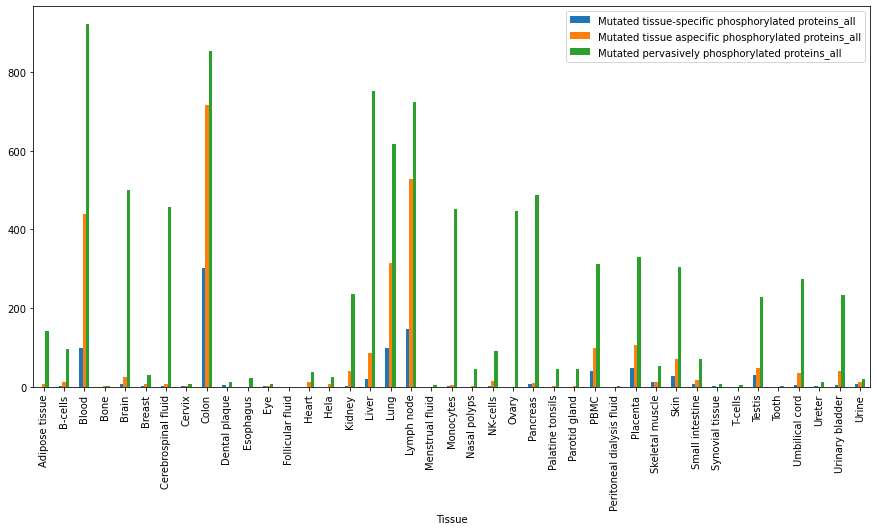

In [30]:
mut_prot_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[tspec_mut[tissue]==1, "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[taspec_mut[tissue]==1, "ACC_ID"].nunique()
    count_gen = gen_mut.loc[gen_mut[tissue]==1, "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue["Mutated tissue-specific phosphorylated proteins_all"] = list_tspec
mut_prot_tissue["Mutated tissue aspecific phosphorylated proteins_all"] = list_taspec
mut_prot_tissue["Mutated pervasively phosphorylated proteins_all"] = list_gen
mut_prot_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("TCGA_abs_all_mutated_proteins.png", format="png", bbox_inches="tight")

In [31]:
prot_three_cat = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
prot_three_cat.head()

,Tissue,number of tissue-specific proteins,number of non tissue-specific proteins,number of generally expressed proteins,Total
0,Adipose tissue,0,39,311,350
1,B-cells,4,27,202,233
2,Blood,241,966,1530,2737
3,Bone,1,1,9,11
4,Brain,19,56,951,1026


<AxesSubplot:title={'center':'Ratio mutated proteins'}, xlabel='Tissue'>

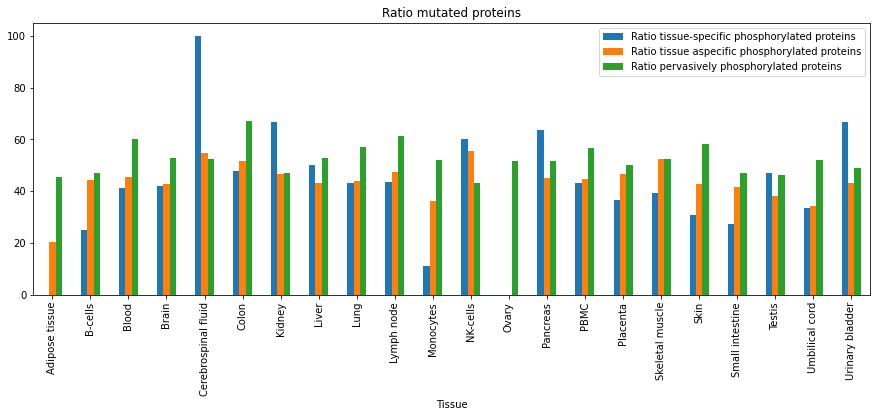

In [32]:
mut_prot_tissue_ratio = prot_three_cat.copy()
mut_prot_tissue_ratio["Ratio tissue-specific phosphorylated proteins"] = mut_prot_tissue["Mutated tissue-specific phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of tissue-specific proteins"]
mut_prot_tissue_ratio["Ratio tissue aspecific phosphorylated proteins"] = mut_prot_tissue["Mutated tissue aspecific phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of non tissue-specific proteins"]
mut_prot_tissue_ratio["Ratio pervasively phosphorylated proteins"] = mut_prot_tissue["Mutated pervasively phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of generally expressed proteins"]
mut_prot_tissue_ratio[((mut_prot_tissue_ratio["number of tissue-specific proteins"]>=100)|
                     (mut_prot_tissue_ratio["number of non tissue-specific proteins"]>=100)|
                     (mut_prot_tissue_ratio["number of generally expressed proteins"]>=100))][["Tissue", "Ratio tissue-specific phosphorylated proteins",
                                                                                          "Ratio tissue aspecific phosphorylated proteins", 
                                                                                          "Ratio pervasively phosphorylated proteins"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated proteins")
#plt.savefig("TCGA_ratio_all_mutated_proteins.png", format="png", bbox_inches="tight")

In [33]:
mut_prot_tissue_ratio

,Tissue,number of tissue-specific proteins,number of non tissue-specific proteins,number of generally expressed proteins,Total,Ratio tissue-specific phosphorylated proteins,Ratio tissue aspecific phosphorylated proteins,Ratio pervasively phosphorylated proteins
0,Adipose tissue,0,39,311,350,NaN,20.512821,45.337621
1,B-cells,4,27,202,233,25.000000,44.444444,47.029703
2,Blood,241,966,1530,2737,41.078838,45.341615,60.196078
3,Bone,1,1,9,11,0.000000,100.000000,22.222222
4,Brain,19,56,951,1026,42.105263,42.857143,52.681388
5,Breast,3,10,74,87,33.333333,70.000000,39.189189
6,Cerebrospinal fluid,1,11,872,884,100.000000,54.545455,52.408257
7,Cervix,4,3,11,18,75.000000,66.666667,72.727273
8,Colon,632,1391,1274,3297,47.784810,51.473760,66.954474
9,Dental plaque,6,3,16,25,66.666667,0.000000,68.750000


<AxesSubplot:xlabel='Tissue'>

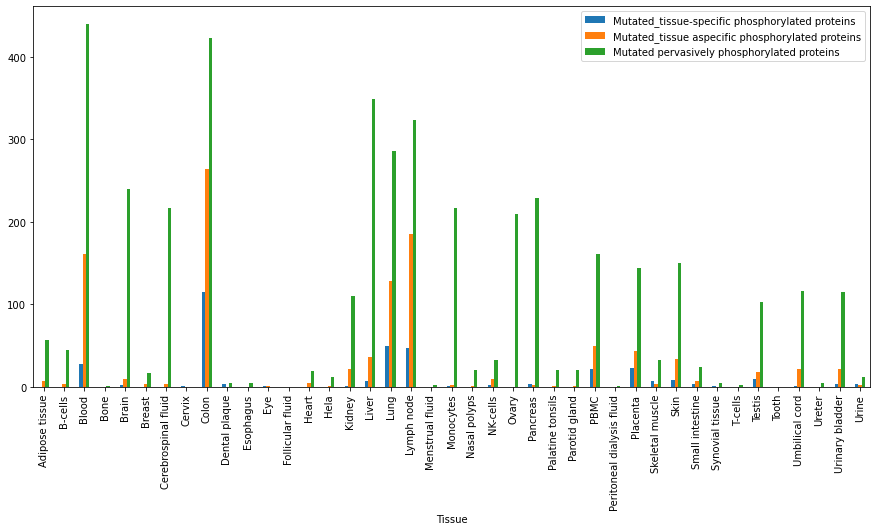

In [34]:
mut_prot_tissue_probd = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Polyphen_imp"]=="probably_damaging"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Polyphen_imp"]=="probably_damaging"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Polyphen_imp"]=="probably_damaging"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_probd["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_probd["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_probd["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_probd.plot(kind="bar", figsize=(15,7), x="Tissue")

In [35]:
mut_prot_tissue_ratio_probd = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_probd["Ratio tissue-specific phosphorylated proteins (probably damaging mutation)"] = mut_prot_tissue_probd["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_probd["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_probd["Ratio tissue aspecific phosphorylated proteins (probably damaging mutation)"] = mut_prot_tissue_probd["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_probd["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_probd["Ratio pervasively phosphorylated proteins (probably damaging mutation)"] = mut_prot_tissue_probd["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_probd["Mutated pervasively phosphorylated proteins_all"]

In [36]:
print(mut_prot_tissue_ratio_probd["Ratio tissue-specific phosphorylated proteins (probably damaging mutation)"].describe())
print(mut_prot_tissue_ratio_probd["Ratio tissue aspecific phosphorylated proteins (probably damaging mutation)"].describe())
print(mut_prot_tissue_ratio_probd["Ratio pervasively phosphorylated proteins (probably damaging mutation)"].describe())

count     27.000000
mean      43.709706
std       28.860967
min        0.000000
25%       28.427128
50%       38.079470
75%       53.752345
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (probably damaging mutation), dtype: float64
count     31.000000
mean      46.939024
std       27.070172
min        0.000000
25%       34.152489
50%       41.666667
75%       55.705128
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins (probably damaging mutation), dtype: float64
count    40.000000
mean     42.924445
std      14.589546
min       0.000000
25%      40.319149
50%      46.383412
75%      49.194501
max      66.666667
Name: Ratio pervasively phosphorylated proteins (probably damaging mutation), dtype: float64


In [37]:
whisker_tspec = 1.5*(50-9.09)
whisker_taspec = 1.5*(50-25)
whisker_gen = 1.5*(39.13-26.51)
print(whisker_tspec, whisker_taspec, whisker_gen)

61.364999999999995 37.5 18.93


<AxesSubplot:title={'center':'Ratio proteins having probably damaging mutation out of proteins having mutation'}, xlabel='Tissue'>

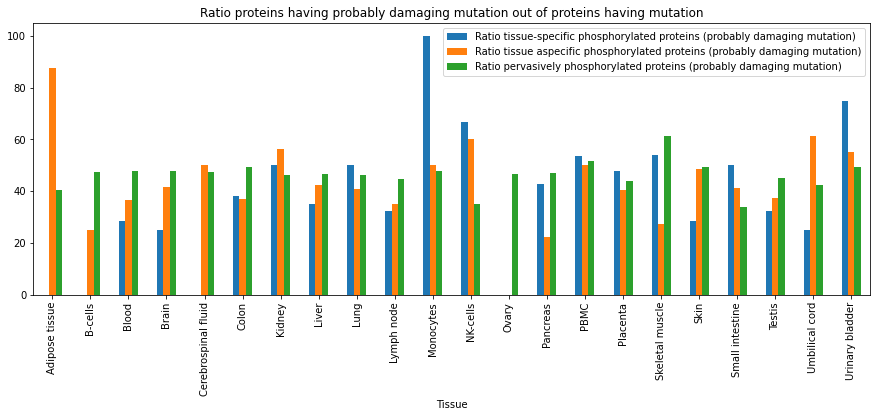

In [38]:
mut_prot_tissue_ratio_probd[(((mut_prot_tissue_ratio_probd["Ratio tissue-specific phosphorylated proteins (probably damaging mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_probd["Mutated tissue-specific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_probd["Ratio tissue aspecific phosphorylated proteins (probably damaging mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_probd["Mutated tissue aspecific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_probd["Ratio pervasively phosphorylated proteins (probably damaging mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_probd["Mutated pervasively phosphorylated proteins_all"]>50)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (probably damaging mutation)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (probably damaging mutation)", 
                                                                                          "Ratio pervasively phosphorylated proteins (probably damaging mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having probably damaging mutation out of proteins having mutation")
#plt.savefig("TCGA_ratio_probdamagign_mutated_proteins.png", format="png", bbox_inches="tight")

In [39]:
mut_prot_tissue_ratio_probd

,Tissue,Mutated tissue-specific phosphorylated proteins_all,Mutated tissue aspecific phosphorylated proteins_all,Mutated pervasively phosphorylated proteins_all,Ratio tissue-specific phosphorylated proteins (probably damaging mutation),Ratio tissue aspecific phosphorylated proteins (probably damaging mutation),Ratio pervasively phosphorylated proteins (probably damaging mutation)
0,Adipose tissue,0,8,141,NaN,87.500000,40.425532
1,B-cells,1,12,95,0.000000,25.000000,47.368421
2,Blood,99,438,921,28.282828,36.757991,47.665581
3,Bone,0,1,2,NaN,0.000000,50.000000
4,Brain,8,24,501,25.000000,41.666667,47.904192
5,Breast,1,7,29,0.000000,42.857143,58.620690
6,Cerebrospinal fluid,1,6,457,0.000000,50.000000,47.483589
7,Cervix,3,2,8,33.333333,0.000000,0.000000
8,Colon,302,716,853,38.079470,36.871508,49.472450
9,Dental plaque,4,0,11,75.000000,NaN,36.363636


<AxesSubplot:xlabel='Tissue'>

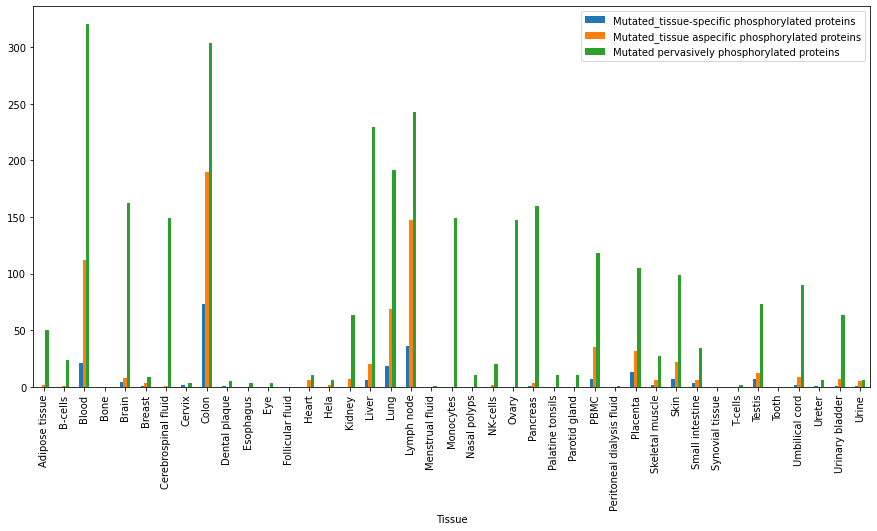

In [40]:
mut_prot_tissue_posd = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Polyphen_imp"]=="possibly_damaging"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Polyphen_imp"]=="possibly_damaging"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Polyphen_imp"]=="possibly_damaging"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_posd["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_posd["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_posd["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_posd.plot(kind="bar", figsize=(15,7), x="Tissue")

In [41]:
mut_prot_tissue_ratio_posd = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_posd["Ratio tissue-specific phosphorylated proteins (possibly damaging mutation)"] = mut_prot_tissue_posd["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_posd["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_posd["Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation)"] = mut_prot_tissue_posd["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_posd["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_posd["Ratio pervasively phosphorylated proteins (possibly damaging mutation)"] = mut_prot_tissue_posd["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_posd["Mutated pervasively phosphorylated proteins_all"]

In [42]:
print(mut_prot_tissue_ratio_posd["Ratio tissue-specific phosphorylated proteins (possibly damaging mutation)"].describe())
print(mut_prot_tissue_ratio_posd["Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation)"].describe())
print(mut_prot_tissue_ratio_posd["Ratio pervasively phosphorylated proteins (possibly damaging mutation)"].describe())

count     27.000000
mean      26.629012
std       27.515823
min        0.000000
25%        6.250000
50%       22.580645
75%       28.541667
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (possibly damaging mutation), dtype: float64
count    31.000000
mean     22.445371
std      15.680278
min       0.000000
25%      10.833333
50%      25.000000
75%      33.333333
max      54.545455
Name: Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation), dtype: float64
count    40.000000
mean     30.347594
std      12.179301
min       0.000000
25%      24.716599
50%      32.125111
75%      35.505475
max      50.000000
Name: Ratio pervasively phosphorylated proteins (possibly damaging mutation), dtype: float64


In [43]:
whisker_tspec = 1.5*(14)
whisker_taspec = 1.5*(36.36)
whisker_gen = 1.5*(33.33-21.04)
print(whisker_tspec, whisker_taspec, whisker_gen)

21.0 54.54 18.435


<AxesSubplot:title={'center':'Ratio proteins having possibly damaging mutation out of proteins having mutation'}, xlabel='Tissue'>

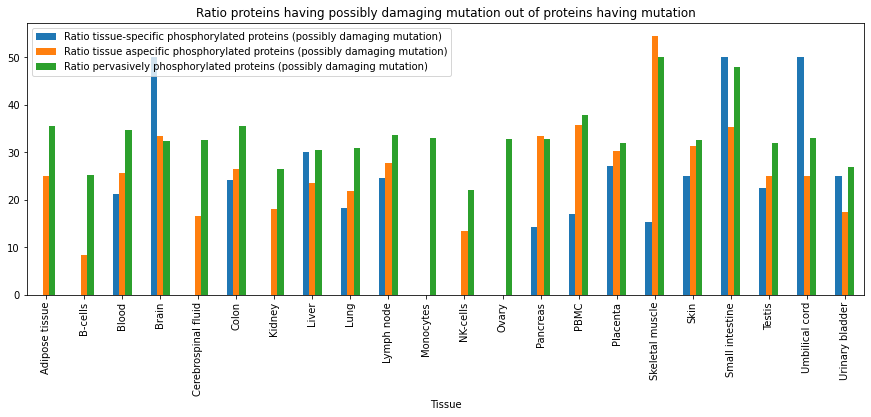

In [44]:
mut_prot_tissue_ratio_posd[(((mut_prot_tissue_ratio_posd["Ratio tissue-specific phosphorylated proteins (possibly damaging mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_posd["Mutated tissue-specific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_posd["Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_posd["Mutated tissue aspecific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_posd["Ratio pervasively phosphorylated proteins (possibly damaging mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_posd["Mutated pervasively phosphorylated proteins_all"]>50)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (possibly damaging mutation)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation)", 
                                                                                          "Ratio pervasively phosphorylated proteins (possibly damaging mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having possibly damaging mutation out of proteins having mutation")
#plt.savefig("TCGA_ratio_posdamaging_mutated_proteins.png", format="png", bbox_inches="tight")

In [45]:
mut_prot_tissue_ratio_posd

,Tissue,Mutated tissue-specific phosphorylated proteins_all,Mutated tissue aspecific phosphorylated proteins_all,Mutated pervasively phosphorylated proteins_all,Ratio tissue-specific phosphorylated proteins (possibly damaging mutation),Ratio tissue aspecific phosphorylated proteins (possibly damaging mutation),Ratio pervasively phosphorylated proteins (possibly damaging mutation)
0,Adipose tissue,0,8,141,NaN,25.000000,35.460993
1,B-cells,1,12,95,0.000000,8.333333,25.263158
2,Blood,99,438,921,21.212121,25.570776,34.744843
3,Bone,0,1,2,NaN,0.000000,0.000000
4,Brain,8,24,501,50.000000,33.333333,32.335329
5,Breast,1,7,29,100.000000,42.857143,31.034483
6,Cerebrospinal fluid,1,6,457,0.000000,16.666667,32.603939
7,Cervix,3,2,8,66.666667,0.000000,37.500000
8,Colon,302,716,853,24.172185,26.536313,35.638921
9,Dental plaque,4,0,11,25.000000,NaN,45.454545


<AxesSubplot:xlabel='Tissue'>

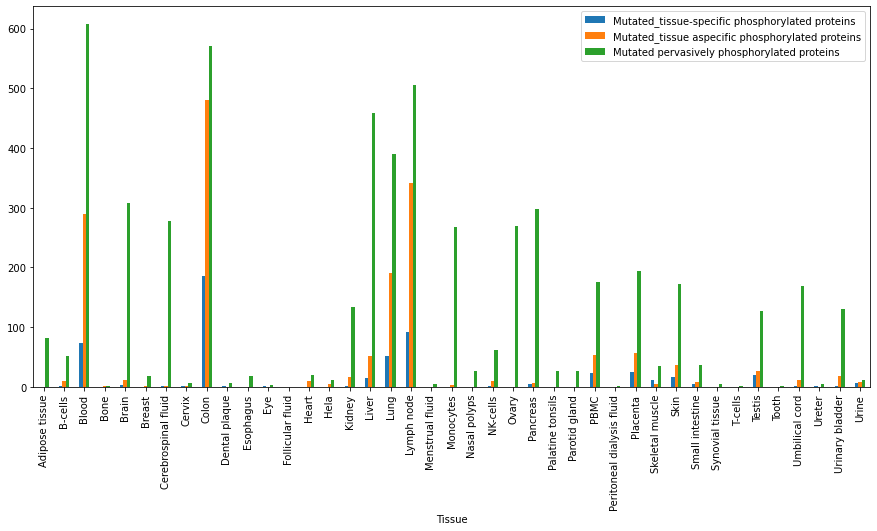

In [46]:
mut_prot_tissue_ben = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Polyphen_imp"]=="benign"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Polyphen_imp"]=="benign"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Polyphen_imp"]=="benign"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_ben["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_ben["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_ben["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_ben.plot(kind="bar", figsize=(15,7), x="Tissue")

In [47]:
mut_prot_tissue_ratio_ben = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated pervasively phosphorylated proteins_all"]

In [48]:
print(mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"].describe())
print(mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"].describe())
print(mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"].describe())

count     27.000000
mean      56.534371
std       28.939133
min        0.000000
25%       43.750000
50%       60.714286
75%       72.582973
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (benign mutation), dtype: float64
count     31.000000
mean      50.644900
std       28.220023
min        0.000000
25%       38.461538
50%       55.102041
75%       66.666667
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins (benign mutation), dtype: float64
count     40.000000
mean      63.257766
std       14.181306
min       38.461538
25%       56.111043
50%       60.328667
75%       66.165020
max      100.000000
Name: Ratio pervasively phosphorylated proteins (benign mutation), dtype: float64


In [49]:
whisker_tspec = 1.5*(80-50)
whisker_taspec = 1.5*(60-25)
whisker_gen = 1.5*(52.27-39.89)
print(whisker_tspec, whisker_taspec, whisker_gen)

45.0 52.5 18.570000000000004


<AxesSubplot:title={'center':'Ratio proteins having benign mutation out of proteins having mutation'}, xlabel='Tissue'>

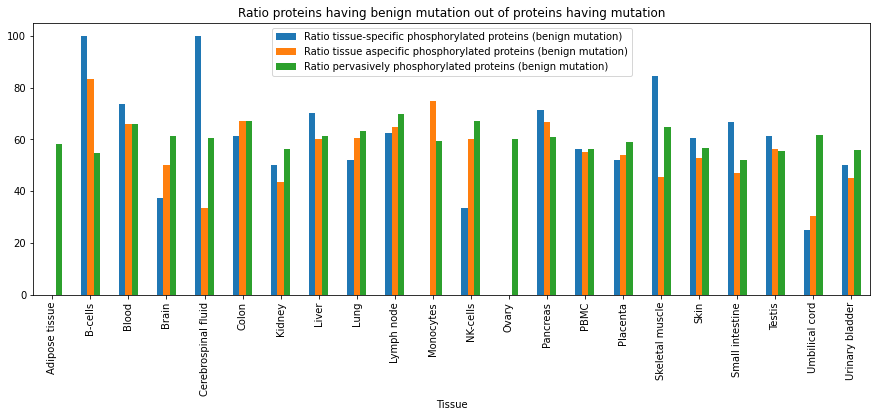

In [50]:
mut_prot_tissue_ratio_ben[(((mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_ben["Mutated tissue-specific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_ben["Mutated tissue aspecific phosphorylated proteins_all"]>50))|
                     ((mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_ben["Mutated pervasively phosphorylated proteins_all"]>50)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (benign mutation)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (benign mutation)", 
                                                                                          "Ratio pervasively phosphorylated proteins (benign mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having benign mutation out of proteins having mutation")
#plt.savefig("TCGA_ratio_benign_mutated_proteins.png", format="png", bbox_inches="tight")

In [51]:
mut_prot_tissue_ratio_ben

,Tissue,Mutated tissue-specific phosphorylated proteins_all,Mutated tissue aspecific phosphorylated proteins_all,Mutated pervasively phosphorylated proteins_all,Ratio tissue-specific phosphorylated proteins (benign mutation),Ratio tissue aspecific phosphorylated proteins (benign mutation),Ratio pervasively phosphorylated proteins (benign mutation)
0,Adipose tissue,0,8,141,NaN,0.000000,58.156028
1,B-cells,1,12,95,100.000000,83.333333,54.736842
2,Blood,99,438,921,73.737374,65.981735,65.906623
3,Bone,0,1,2,NaN,100.000000,100.000000
4,Brain,8,24,501,37.500000,50.000000,61.477046
5,Breast,1,7,29,0.000000,28.571429,62.068966
6,Cerebrospinal fluid,1,6,457,100.000000,33.333333,60.612691
7,Cervix,3,2,8,33.333333,100.000000,75.000000
8,Colon,302,716,853,61.258278,67.178771,66.940211
9,Dental plaque,4,0,11,50.000000,NaN,63.636364


No variants of unknown significance

<AxesSubplot:xlabel='Tissue'>

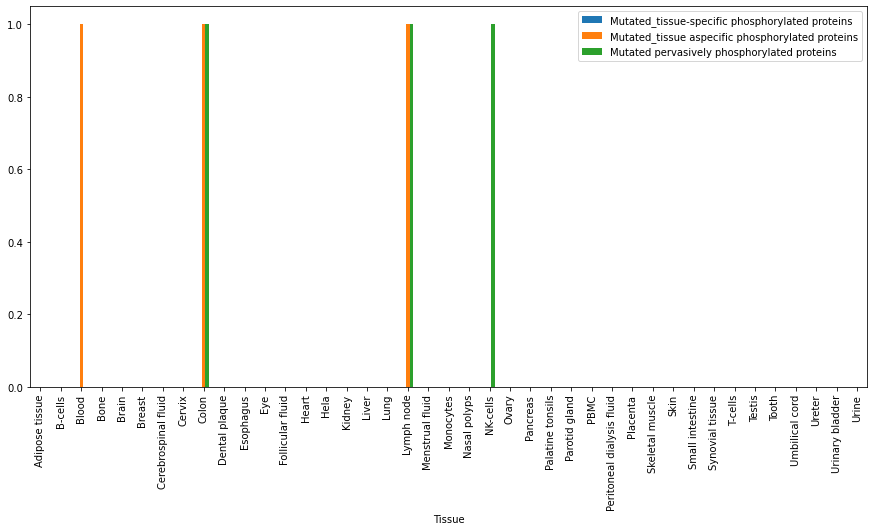

In [52]:
mut_prot_tissue_us = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Polyphen_imp"]=="unknown"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Polyphen_imp"]=="unknown"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Polyphen_imp"]=="unknown"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_us["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_us["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_us["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_us.plot(kind="bar", figsize=(15,7), x="Tissue")

In [53]:
#mut_prot_tissue_ratio_us = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
#mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown mutation)"] = mut_prot_tissue_us["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated tissue-specific phosphorylated proteins_all"]
#mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown mutation)"] = mut_prot_tissue_us["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated tissue aspecific phosphorylated proteins_all"]
#mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown mutation)"] = mut_prot_tissue_us["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated pervasively phosphorylated proteins_all"]

In [54]:
#print(mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown mutation)"].describe())
#print(mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown mutation)"].describe())
#print(mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown mutation)"].describe())

In [55]:
#whisker_tspec = 1.5*(12.91)
#whisker_taspec = 1.5*(10.29)
#whisker_gen = 1.5*(14.87)
#print(whisker_tspec, whisker_taspec, whisker_gen)

In [56]:
#mut_prot_tissue_ratio_us[(((mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_us["Mutated tissue-specific phosphorylated proteins_all"]>50))|
#                     ((mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_us["Mutated tissue aspecific phosphorylated proteins_all"]>50))|
#                     ((mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_us["Mutated pervasively phosphorylated proteins_all"]>50)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (unknown mutation)",
#                                                                                          "Ratio tissue aspecific phosphorylated proteins (unknown mutation)", 
#                                                                                          "Ratio pervasively phosphorylated proteins (unknown mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having unknown mutation out of proteins having mutation")
#plt.savefig("TCGA_ratio_usamagign_mutated_proteins.png", format="png", bbox_inches="tight")

In [57]:
#mut_prot_tissue_ratio_us

# Frequency of mutation - P-site level

In [58]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [59]:
tspec_site_mut1 = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_site_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"VEP_imp":"first"}).shape[0])
print(tspec_site_mut1["ACC_ID"].nunique())

612
558


In [60]:
taspec_site_mut1 = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_site_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"VEP_imp":"first"}).shape[0])
print(taspec_site_mut1["ACC_ID"].nunique())

278
255


In [61]:
gen_site_mut1 = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_site_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"VEP_imp":"first"}).shape[0])
print(gen_site_mut1["ACC_ID"].nunique())

182
156


In [62]:
tspec_site_mut = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
tspec_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,72,73,ENSG00000129173,A,V,missense_variant,probably_damaging,deleterious,MODERATE,1
1,A0FGR8,736,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,740,741,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,3
2,A0FGR8,737,Colon,S,0,0,0,0,0,0,...,741,742,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,2
3,A0FGR8,743,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,747,748,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,-4
4,A0JNW5,423,"Colon,Colon",S,0,0,0,0,0,0,...,427,428,ENSG00000111647,P,S,missense_variant,benign,tolerated,MODERATE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,Q9Y6W5,296,"Lymph node,Lymph node,Lymph node,Lymph node",S,0,0,0,0,0,0,...,300,301,ENSG00000158195,P,S,missense_variant,possibly_damaging,tolerated,MODERATE,1
7532,Q9Y6X4,398,Lymph node,S,0,0,0,0,0,0,...,402,403,ENSG00000198780,A,E,missense_variant,benign,tolerated,MODERATE,5
7533,Q9Y6X9,615,Blood,S,0,0,1,0,0,0,...,619,620,ENSG00000133422,P,S,missense_variant,probably_damaging,deleterious,MODERATE,-2
7534,Q9Y6X9,733,Colon,T,0,0,0,0,0,0,...,737,738,ENSG00000133422,P,L,missense_variant,benign,tolerated_low_confidence,MODERATE,1


In [63]:
taspec_site_mut = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
taspec_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,75,76,ENSG00000129173,A,V,missense_variant,probably_damaging,deleterious,MODERATE,-2
1,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,106,107,ENSG00000129173,E,K,missense_variant,probably_damaging,deleterious,MODERATE,3
2,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,742,743,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,1
3,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,743,744,ENSG00000117868,S,C,missense_variant,probably_damaging,tolerated,MODERATE,0
4,A0FGR8,758,"Liver,Liver,Blood,Testis",S,0,0,1,0,0,0,...,762,763,ENSG00000117868,S,L,missense_variant,probably_damaging,deleterious,MODERATE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,Q9Y6Q9,214,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...",S,0,0,1,0,0,0,...,218,219,ENSG00000124151,E,K,missense_variant,possibly_damaging,deleterious,MODERATE,-5
3511,Q9Y6Q9,214,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...",S,0,0,1,0,0,0,...,218,219,ENSG00000124151,A,G,missense_variant,benign,tolerated,MODERATE,-1
3512,Q9Y6Q9,214,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...",S,0,0,1,0,0,0,...,218,219,ENSG00000124151,A,V,missense_variant,benign,tolerated,MODERATE,-1
3513,Q9Y6Q9,857,"Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...",S,0,0,1,0,0,0,...,861,862,ENSG00000124151,R,Q,missense_variant,probably_damaging,tolerated,MODERATE,-3


In [64]:
gen_site_mut = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
gen_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,distance
0,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,1406,1407,ENSG00000111647,Q,H,missense_variant,probably_damaging,deleterious,MODERATE,-2
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,1406,1407,ENSG00000111647,G,W,missense_variant,benign,deleterious,MODERATE,2
2,A5A3E0,939,"Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...",S,0,0,1,0,1,0,...,943,944,ENSG00000196604,K,N,missense_variant,probably_damaging,deleterious_low_confidence,MODERATE,-1
3,A5A3E0,940,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",Y,1,0,1,0,1,0,...,944,945,ENSG00000196604,K,N,missense_variant,probably_damaging,deleterious_low_confidence,MODERATE,-2
4,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,72,73,ENSG00000059915,R,H,missense_variant,possibly_damaging,deleterious_low_confidence,MODERATE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Q9Y6V0,4024,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,4028,4029,ENSG00000186472,S,G,missense_variant,benign,tolerated,MODERATE,-5
2024,Q9Y6V0,4024,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,4028,4029,ENSG00000186472,S,I,missense_variant,probably_damaging,deleterious,MODERATE,-4
2025,Q9Y6V0,4024,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,4028,4029,ENSG00000186472,P,L,missense_variant,probably_damaging,deleterious,MODERATE,1
2026,Q9Y6V0,4395,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,4399,4400,ENSG00000186472,D,N,missense_variant,probably_damaging,tolerated,MODERATE,-5


In [65]:
print(tspec_site_mut["ACC_ID"].nunique())
print(tspec_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(taspec_site_mut["ACC_ID"].nunique())
print(taspec_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(gen_site_mut["ACC_ID"].nunique())
print(gen_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])

2757
5478
1424
2525
707
1398


<AxesSubplot:xlabel='Tissue'>

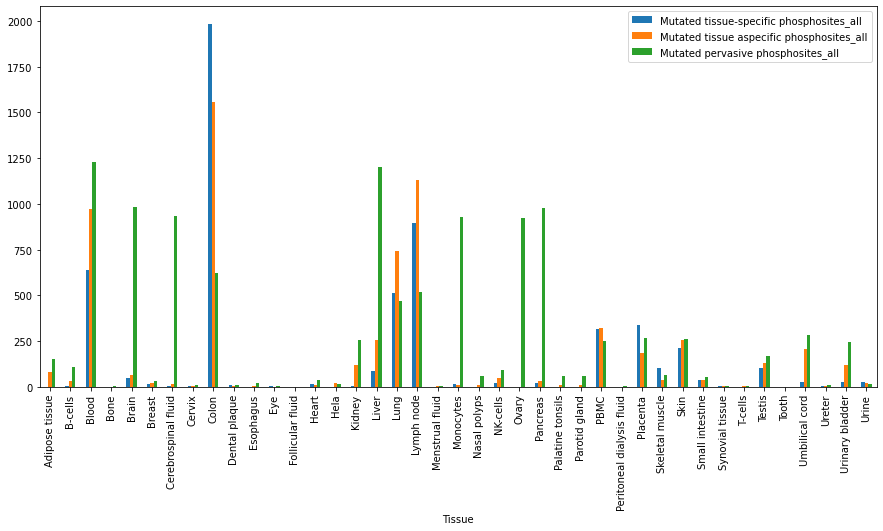

In [66]:
mut_sites_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[tspec_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[taspec_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    gen_mut_tissue = gen_site_mut.loc[gen_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue["Mutated tissue-specific phosphosites_all"] = list_tspec
mut_sites_tissue["Mutated tissue aspecific phosphosites_all"] = list_taspec
mut_sites_tissue["Mutated pervasive phosphosites_all"] = list_gen
mut_sites_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("TCGA_abs_all_mutated_sites.png", format="png", bbox_inches="tight")

In [67]:
sites_three_cat = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
sites_three_cat.head()

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total
0,Adipose tissue,0,221,390,611
1,B-cells,16,95,250,361
2,Blood,1642,2466,2961,7069
3,Bone,2,2,9,13
4,Brain,121,176,2307,2604


In [68]:
print(TCGA.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(TCGA[TCGA["Polyphen_imp"]=="probably_damaging"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(TCGA[TCGA["Polyphen_imp"]=="possibly_damaging"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(TCGA[TCGA["Polyphen_imp"]=="benign"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])
print(TCGA[TCGA["Polyphen_imp"]=="unknown"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"}).shape[0])

558727
202521
105610
256663
286


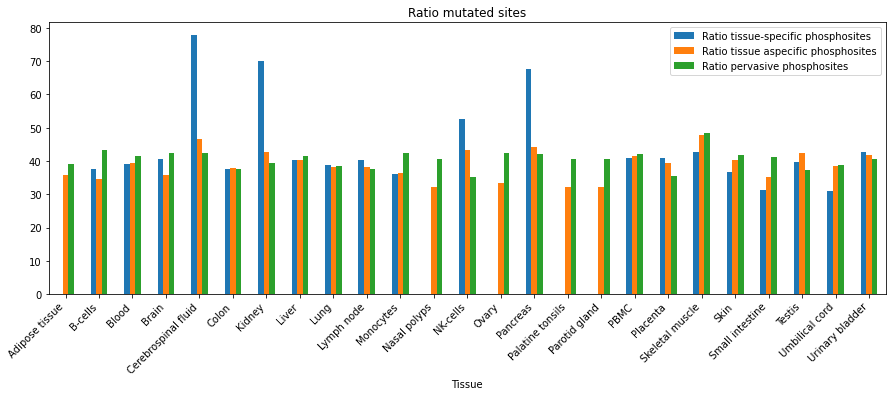

In [70]:
mut_sites_tissue_ratio = sites_three_cat.copy()
mut_sites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_sites_tissue["Mutated tissue-specific phosphosites_all"]*100/mut_sites_tissue_ratio["number of tissue-specific sites"]
mut_sites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_sites_tissue["Mutated tissue aspecific phosphosites_all"]*100/mut_sites_tissue_ratio["number of non tissue-specific sites"]
mut_sites_tissue_ratio["Ratio pervasive phosphosites"] = mut_sites_tissue["Mutated pervasive phosphosites_all"]*100/mut_sites_tissue_ratio["number of generally expressed sites"]
mut_sites_tissue_ratio[((mut_sites_tissue_ratio["number of tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of non tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of generally expressed sites"]>=100))][["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
plt.xticks(rotation=45, ha="right")
#plt.savefig("TCGA_ratio_mutated_sites.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:title={'center':'Ratio mutated sites'}, xlabel='Tissue'>

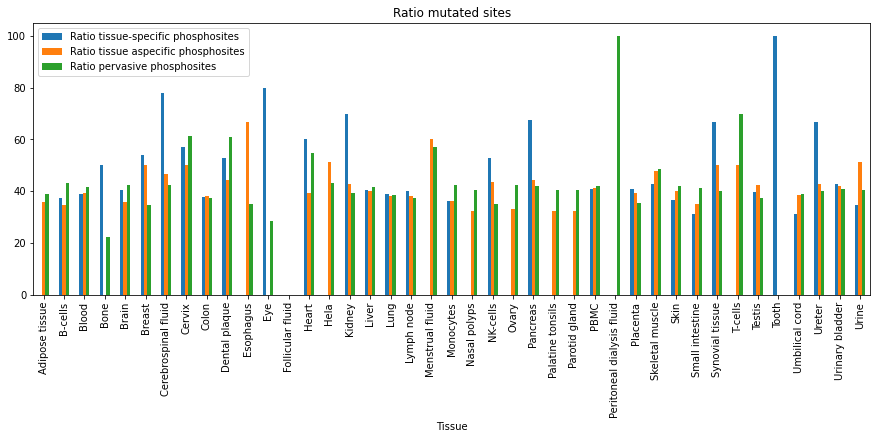

In [70]:
mut_sites_tissue_ratio = sites_three_cat.copy()
mut_sites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_sites_tissue["Mutated tissue-specific phosphosites_all"]*100/mut_sites_tissue_ratio["number of tissue-specific sites"]
mut_sites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_sites_tissue["Mutated tissue aspecific phosphosites_all"]*100/mut_sites_tissue_ratio["number of non tissue-specific sites"]
mut_sites_tissue_ratio["Ratio pervasive phosphosites"] = mut_sites_tissue["Mutated pervasive phosphosites_all"]*100/mut_sites_tissue_ratio["number of generally expressed sites"]
mut_sites_tissue_ratio[["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
#plt.savefig("TCGA_ratio_mutated_sites_nonfiltered.png", format="png", bbox_inches="tight")

In [71]:
mut_sites_tissue_ratio

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total,Ratio tissue-specific phosphosites,Ratio tissue aspecific phosphosites,Ratio pervasive phosphosites
0,Adipose tissue,0,221,390,611,NaN,35.746606,38.974359
1,B-cells,16,95,250,361,37.500000,34.736842,43.200000
2,Blood,1642,2466,2961,7069,39.037759,39.334955,41.573793
3,Bone,2,2,9,13,50.000000,0.000000,22.222222
4,Brain,121,176,2307,2604,40.495868,35.795455,42.522757
5,Breast,26,42,89,157,53.846154,50.000000,34.831461
6,Cerebrospinal fluid,9,30,2203,2242,77.777778,46.666667,42.351339
7,Cervix,7,8,13,28,57.142857,50.000000,61.538462
8,Colon,5252,4089,1651,10992,37.718964,38.028858,37.552998
9,Dental plaque,17,9,18,44,52.941176,44.444444,61.111111


<AxesSubplot:xlabel='Tissue'>

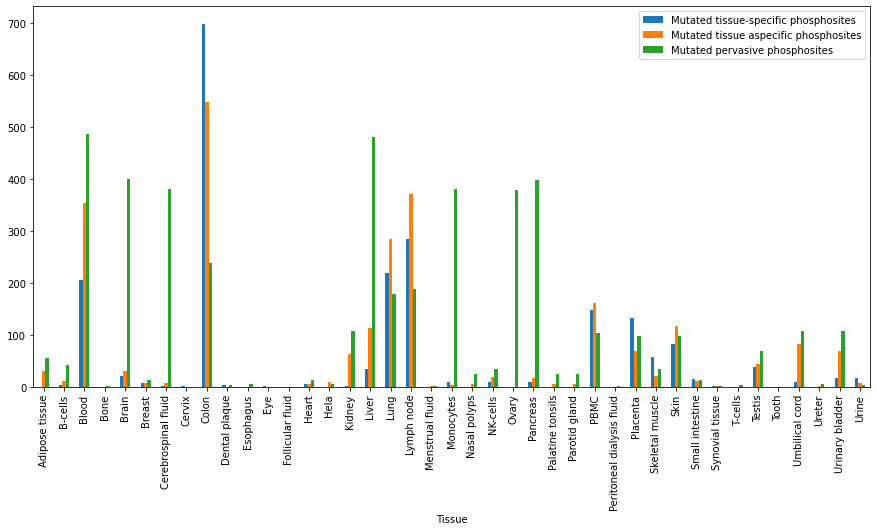

In [72]:
mut_sites_tissue_probd = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Polyphen_imp"]=="probably_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Polyphen_imp"]=="probably_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Polyphen_imp"]=="probably_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_probd["Mutated tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_probd["Mutated tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_probd["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_probd.plot(kind="bar", figsize=(15,7), x="Tissue")

In [73]:
mut_sites_tissue_ratio_probd = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_probd["Ratio tissue-specific phosphosites (probably damaging mutation)"] = mut_sites_tissue_probd["Mutated tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_probd["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_probd["Ratio tissue aspecific phosphosites (probably damaging mutation)"] = mut_sites_tissue_probd["Mutated tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_probd["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_probd["Ratio pervasive phosphosites (probably damaging mutation)"] = mut_sites_tissue_probd["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_probd["Mutated pervasive phosphosites_all"]

In [74]:
print(mut_sites_tissue_ratio_probd["Ratio tissue-specific phosphosites (probably damaging mutation)"].describe())
print(mut_sites_tissue_ratio_probd["Ratio tissue aspecific phosphosites (probably damaging mutation)"].describe())
print(mut_sites_tissue_ratio_probd["Ratio pervasive phosphosites (probably damaging mutation)"].describe())

count     30.000000
mean      41.003674
std       20.401166
min        0.000000
25%       32.782022
50%       39.504284
75%       50.000000
max      100.000000
Name: Ratio tissue-specific phosphosites (probably damaging mutation), dtype: float64
count     36.000000
mean      38.154517
std       19.774457
min        0.000000
25%       33.333333
50%       38.304376
75%       50.000000
max      100.000000
Name: Ratio tissue aspecific phosphosites (probably damaging mutation), dtype: float64
count    39.000000
mean     37.257535
std      11.593556
min       0.000000
25%      36.241717
50%      40.033361
75%      41.489655
max      57.142857
Name: Ratio pervasive phosphosites (probably damaging mutation), dtype: float64


In [75]:
whisker_tspec = 1.5*(50-27.77)
whisker_taspec = 1.5*(46.29-20.56)
whisker_gen = 1.5*(36.67-23.9)
print(whisker_tspec, whisker_taspec, whisker_gen)

33.345 38.595 19.155000000000005


<AxesSubplot:title={'center':'Ratio sites having probably damaging mutation out of sites having mutation'}, xlabel='Tissue'>

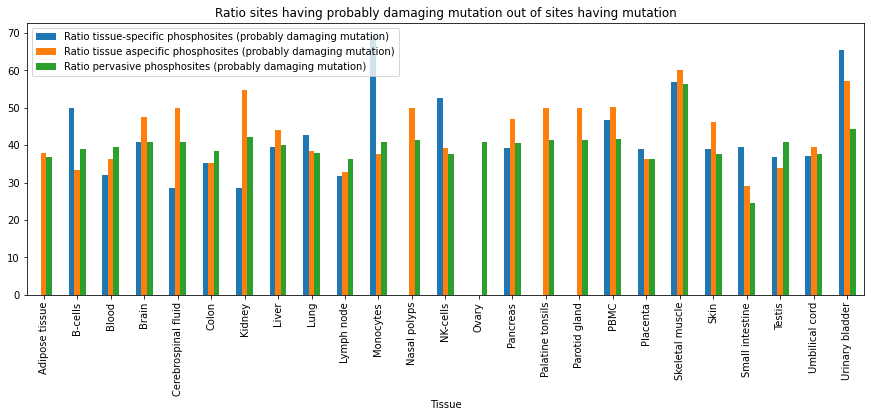

In [76]:
mut_sites_tissue_ratio_probd[(((mut_sites_tissue_ratio_probd["Ratio tissue-specific phosphosites (probably damaging mutation)"]>=whisker_tspec)&(mut_sites_tissue_ratio_probd["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_probd["Ratio tissue aspecific phosphosites (probably damaging mutation)"]>=whisker_taspec)&(mut_sites_tissue_ratio_probd["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_probd["Ratio pervasive phosphosites (probably damaging mutation)"]>=whisker_gen)&(mut_sites_tissue_ratio_probd["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (probably damaging mutation)",
                                                                                          "Ratio tissue aspecific phosphosites (probably damaging mutation)", 
                                                                                          "Ratio pervasive phosphosites (probably damaging mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having probably damaging mutation out of sites having mutation")
#plt.savefig("TCGA_ratio_probd_mutated_siteseins.png", format="png", bbox_inches="tight")

In [77]:
mut_sites_tissue_ratio_probd

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (probably damaging mutation),Ratio tissue aspecific phosphosites (probably damaging mutation),Ratio pervasive phosphosites (probably damaging mutation)
0,Adipose tissue,0,79,152,NaN,37.974684,36.842105
1,B-cells,6,33,108,50.000000,33.333333,38.888889
2,Blood,641,970,1231,31.981279,36.391753,39.480097
3,Bone,1,0,2,0.000000,NaN,50.000000
4,Brain,49,63,981,40.816327,47.619048,40.774720
5,Breast,14,21,31,57.142857,38.095238,41.935484
6,Cerebrospinal fluid,7,14,933,28.571429,50.000000,40.836013
7,Cervix,4,4,8,25.000000,0.000000,0.000000
8,Colon,1981,1555,620,35.184250,35.176849,38.387097
9,Dental plaque,9,4,11,44.444444,0.000000,27.272727


<AxesSubplot:xlabel='Tissue'>

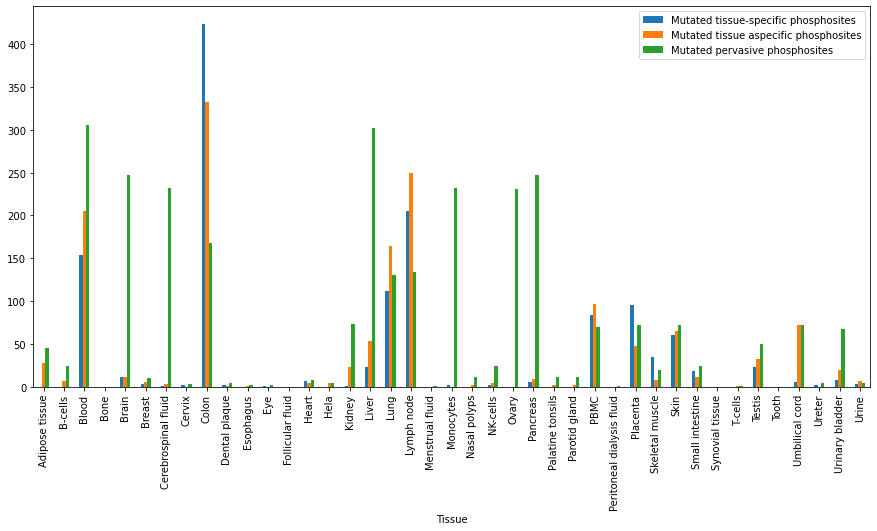

In [78]:
mut_sites_tissue_posd = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Polyphen_imp"]=="possibly_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Polyphen_imp"]=="possibly_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Polyphen_imp"]=="possibly_damaging"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_posd["Mutated tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_posd["Mutated tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_posd["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_posd.plot(kind="bar", figsize=(15,7), x="Tissue")

In [79]:
mut_sites_tissue_ratio_posd = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_posd["Ratio tissue-specific phosphosites (possibly damaging mutation)"] = mut_sites_tissue_posd["Mutated tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_posd["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_posd["Ratio tissue aspecific phosphosites (possibly damaging mutation)"] = mut_sites_tissue_posd["Mutated tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_posd["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_posd["Ratio pervasive phosphosites (possibly damaging mutation)"] = mut_sites_tissue_posd["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_posd["Mutated pervasive phosphosites_all"]

In [80]:
print(mut_sites_tissue_ratio_posd["Ratio tissue-specific phosphosites (possibly damaging mutation)"].describe())
print(mut_sites_tissue_ratio_posd["Ratio tissue aspecific phosphosites (possibly damaging mutation)"].describe())
print(mut_sites_tissue_ratio_posd["Ratio pervasive phosphosites (possibly damaging mutation)"].describe())

count     30.000000
mean      24.550674
std       19.169253
min        0.000000
25%       14.560440
50%       22.389538
75%       27.765928
max      100.000000
Name: Ratio tissue-specific phosphosites (possibly damaging mutation), dtype: float64
count    36.000000
mean     21.022804
std      11.877814
min       0.000000
25%      19.505495
50%      21.776233
75%      25.868984
max      50.000000
Name: Ratio tissue aspecific phosphosites (possibly damaging mutation), dtype: float64
count    39.000000
mean     26.921148
std      10.616313
min       0.000000
25%      24.821314
50%      25.769231
75%      29.772691
max      50.000000
Name: Ratio pervasive phosphosites (possibly damaging mutation), dtype: float64


In [81]:
whisker_tspec = 1.5*(25)
whisker_taspec = 1.5*(31-12.7)
whisker_gen = 1.5*(32.59-20.67)
print(whisker_tspec, whisker_taspec, whisker_gen)

37.5 27.450000000000003 17.880000000000003


<AxesSubplot:title={'center':'Ratio sites having possibly damaging mutation out of sites having mutation'}, xlabel='Tissue'>

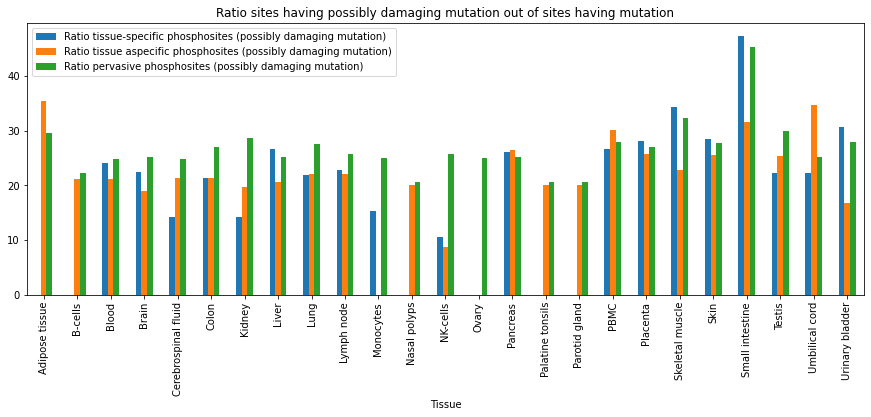

In [82]:
mut_sites_tissue_ratio_posd[(((mut_sites_tissue_ratio_posd["Ratio tissue-specific phosphosites (possibly damaging mutation)"]>=whisker_tspec)&(mut_sites_tissue_ratio_posd["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_posd["Ratio tissue aspecific phosphosites (possibly damaging mutation)"]>=whisker_taspec)&(mut_sites_tissue_ratio_posd["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_posd["Ratio pervasive phosphosites (possibly damaging mutation)"]>=whisker_gen)&(mut_sites_tissue_ratio_posd["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (possibly damaging mutation)",
                                                                                          "Ratio tissue aspecific phosphosites (possibly damaging mutation)", 
                                                                                          "Ratio pervasive phosphosites (possibly damaging mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having possibly damaging mutation out of sites having mutation")
#plt.savefig("TCGA_ratio_posd_mutated_siteseins.png", format="png", bbox_inches="tight")

In [83]:
mut_sites_tissue_ratio_posd

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (possibly damaging mutation),Ratio tissue aspecific phosphosites (possibly damaging mutation),Ratio pervasive phosphosites (possibly damaging mutation)
0,Adipose tissue,0,79,152,NaN,35.443038,29.605263
1,B-cells,6,33,108,0.000000,21.212121,22.222222
2,Blood,641,970,1231,24.024961,21.134021,24.776604
3,Bone,1,0,2,0.000000,NaN,0.000000
4,Brain,49,63,981,22.448980,19.047619,25.178389
5,Breast,14,21,31,21.428571,28.571429,32.258065
6,Cerebrospinal fluid,7,14,933,14.285714,21.428571,24.866024
7,Cervix,4,4,8,50.000000,0.000000,37.500000
8,Colon,1981,1555,620,21.352852,21.350482,27.096774
9,Dental plaque,9,4,11,22.222222,25.000000,45.454545


<AxesSubplot:xlabel='Tissue'>

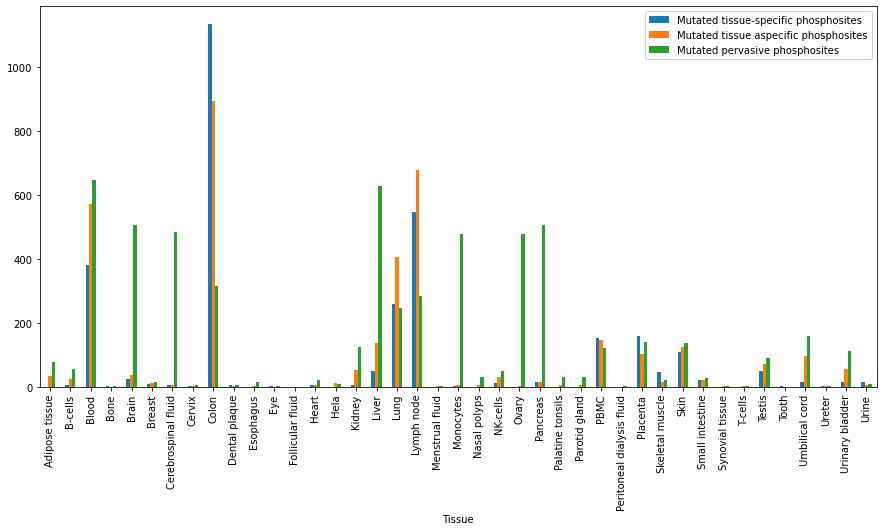

In [84]:
mut_sites_tissue_ben = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Polyphen_imp"]=="benign"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Polyphen_imp"]=="benign"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Polyphen_imp"]=="benign"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_ben["Mutated tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_ben["Mutated tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_ben["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_ben.plot(kind="bar", figsize=(15,7), x="Tissue")

In [85]:
mut_sites_tissue_ratio_ben = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated pervasive phosphosites_all"]

In [86]:
print(mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"].describe())
print(mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"].describe())
print(mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"].describe())

count     30.000000
mean      58.022118
std       20.851037
min        0.000000
25%       48.575949
50%       55.409357
75%       61.055380
max      100.000000
Name: Ratio tissue-specific phosphosites (benign mutation), dtype: float64
count     36.000000
mean      57.619795
std       13.957774
min       36.842105
25%       49.606299
50%       55.104784
75%       60.625000
max      100.000000
Name: Ratio tissue aspecific phosphosites (benign mutation), dtype: float64
count     39.000000
mean      57.187147
std       15.269319
min       32.258065
25%       51.550655
50%       52.692308
75%       55.305505
max      100.000000
Name: Ratio pervasive phosphosites (benign mutation), dtype: float64


In [87]:
whisker_tspec = 1.5*(52.28-33.33)
whisker_taspec = 1.5*(55.42-36.68)
whisker_gen = 1.5*(51.42-33.33)
print(whisker_tspec, whisker_taspec, whisker_gen)

28.425000000000004 28.110000000000003 27.135000000000005


None of the ratios exceeds the whisker.

<AxesSubplot:title={'center':'Ratio sites having benign mutation out of sites having mutation'}, xlabel='Tissue'>

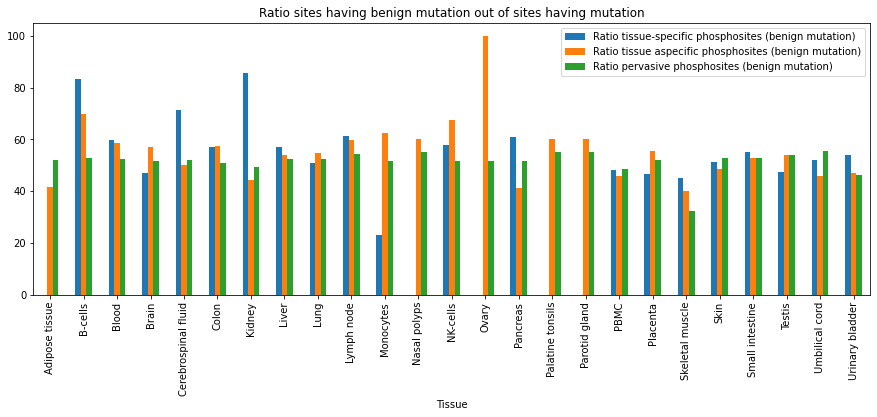

In [88]:
mut_sites_tissue_ratio_ben[(((mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"]>=whisker_tspec)&(mut_sites_tissue_ratio_ben["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"]>=whisker_taspec)&(mut_sites_tissue_ratio_ben["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"]>=whisker_gen)&(mut_sites_tissue_ratio_ben["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (benign mutation)",
                                                                                          "Ratio tissue aspecific phosphosites (benign mutation)", 
                                                                                          "Ratio pervasive phosphosites (benign mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having benign mutation out of sites having mutation")
#plt.savefig("TCGA_ratio_benign_mutated_siteseins.png", format="png", bbox_inches="tight")

In [89]:
mut_sites_tissue_ratio_ben

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (benign mutation),Ratio tissue aspecific phosphosites (benign mutation),Ratio pervasive phosphosites (benign mutation)
0,Adipose tissue,0,79,152,NaN,41.772152,51.973684
1,B-cells,6,33,108,83.333333,69.696970,52.777778
2,Blood,641,970,1231,59.594384,58.762887,52.477660
3,Bone,1,0,2,100.000000,NaN,100.000000
4,Brain,49,63,981,46.938776,57.142857,51.580020
5,Breast,14,21,31,57.142857,57.142857,45.161290
6,Cerebrospinal fluid,7,14,933,71.428571,50.000000,51.875670
7,Cervix,4,4,8,50.000000,100.000000,62.500000
8,Colon,1981,1555,620,57.142857,57.427653,50.806452
9,Dental plaque,9,4,11,66.666667,75.000000,54.545455


# Proteins having tissue-specific P-sites

In [90]:
tpsecsites_tspecproteins = pd.merge(tspec_proteins["ACC_ID"], data_site, how="inner", on=["ACC_ID"])
print(tpsecsites_tspecproteins.shape[0])
print(tpsecsites_tspecproteins["ACC_ID"].nunique())

2794
2029


In [91]:
tspecsites_taspecproteins = pd.merge(taspec_proteins["ACC_ID"], data_site, how="inner", on=["ACC_ID"])
tspecsites_taspecproteins = pd.merge(tspecsites_taspecproteins[["ACC_ID", "UP_POS"]], tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_taspecproteins.shape[0])
print(tspecsites_taspecproteins["ACC_ID"].nunique())

4989
1596


In [92]:
tspecsites_genproteins = pd.merge(gen_proteins, data_site, how="inner", on=["ACC_ID"])
tspecsites_genproteins = pd.merge(tspecsites_genproteins[["ACC_ID", "UP_POS"]], tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_genproteins.shape[0])
print(tspecsites_genproteins["ACC_ID"].nunique())

6236
1352


In [93]:
tspecsites_tspecproteins_mut = pd.merge(tpsecsites_tspecproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_tspecproteins_mut.shape[0])
print(tspecsites_tspecproteins_mut["ACC_ID"].nunique())

1621
882


In [94]:
tspecsites_taspecproteins_mut = pd.merge(tspecsites_taspecproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_taspecproteins_mut.shape[0])
print(tspecsites_taspecproteins_mut["ACC_ID"].nunique())

2580
952


In [95]:
tspecsites_genproteins_mut = pd.merge(tspecsites_genproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_genproteins_mut.shape[0])
print(tspecsites_genproteins_mut["ACC_ID"].nunique())

3335
923


<AxesSubplot:xlabel='Tissue'>

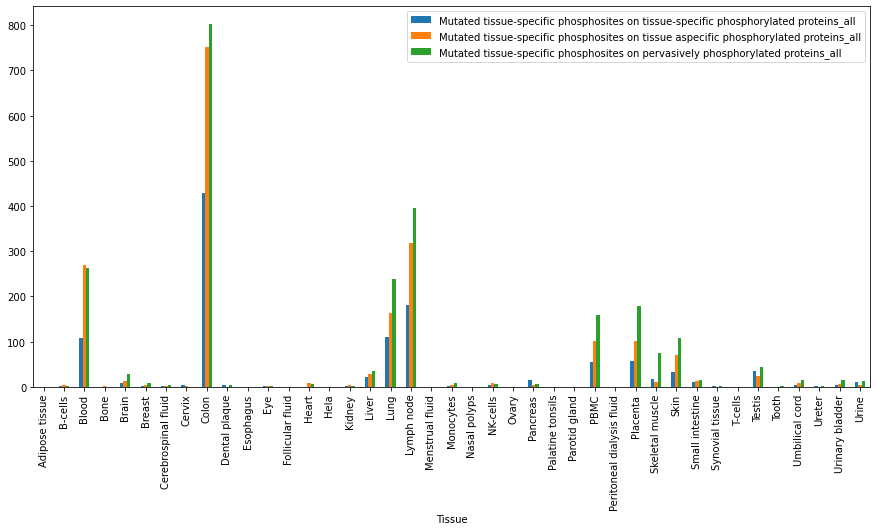

In [96]:
mut_tspecsites_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tissue = tissue+"_x"
    tspec_mut_tissue = tspecsites_tspecproteins_mut.loc[tspecsites_tspecproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    taspec_mut_tissue = tspecsites_taspecproteins_mut.loc[tspecsites_taspecproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    gen_mut_tissue = tspecsites_genproteins_mut.loc[tspecsites_genproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"Consequence": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue-specific phosphorylated proteins_all"] = list_tspec
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue aspecific phosphorylated proteins_all"] = list_taspec
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on pervasively phosphorylated proteins_all"] = list_gen
mut_tspecsites_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("TCGAabs_all_mutated_tspecsites.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Ratio mutated sites'}, xlabel='Tissue'>

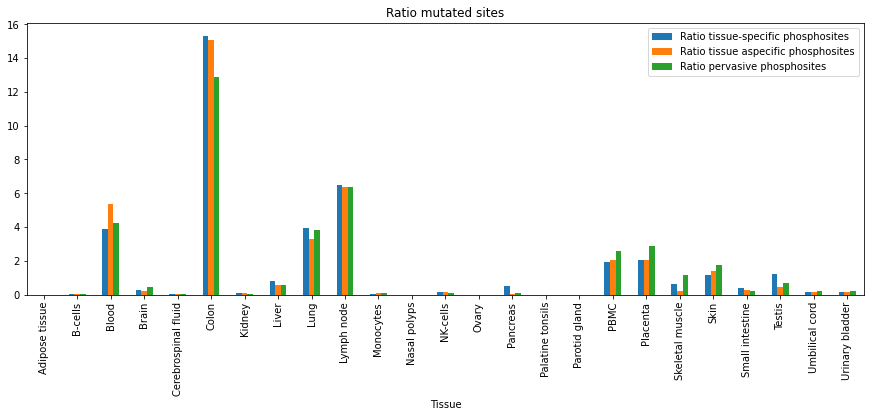

In [97]:
mut_tspecsites_tissue_ratio = pd.DataFrame({"Tissue": list_tissues_STY})
mut_tspecsites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue-specific phosphorylated proteins_all"]*100/tpsecsites_tspecproteins.shape[0]
mut_tspecsites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue aspecific phosphorylated proteins_all"]*100/tspecsites_taspecproteins.shape[0]
mut_tspecsites_tissue_ratio["Ratio pervasive phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on pervasively phosphorylated proteins_all"]*100/tspecsites_genproteins.shape[0]
mut_tspecsites_tissue_ratio[((mut_sites_tissue_ratio["number of tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of non tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of generally expressed sites"]>=100))][["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
#plt.savefig("TCGA_ratio_mutated_tspecsites.png", format="png", bbox_inches="tight")

# Comparison of the frequency of mutation on non-P STY sites

In [98]:
data = pd.read_csv("phospho_data_tissue_annotation.tsv", sep="\t")
data.dropna(inplace=True)
print(data.shape[0])
data.head()

586479


,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,tissue
0,PXD000004,RPPSPEPSTK,S,2102,Q01082,2099,2108,Brain
1,PXD000004,ACVVHGSDLK,C,660,P50993,659,668,Brain
2,PXD000004,ACVVHGSDLK,C,663,P05023,662,671,Brain
3,PXD000004,AISPTSATSSGR,S,600,Q9Y4I1,598,609,Brain
4,PXD000004,FYYTAGSSSPTHAK,S,198,O75508,190,203,Brain


We summarise the data on the phosphosite level. For these sites identified on multiple peptides, we select the longest.

In [99]:
data = data[(data["modres"]=="S")|(data["modres"]=="T")|(data["modres"]=="Y")]
data_gr = data.groupby(["ACC_ID", "UP_POS", "modres"], as_index=False).agg({"peptide": lambda x: max(x, key=len),
                                                                 "pep_start": lambda x: min(x), "pep_end": lambda x: max(x)})
data_gr.head()

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end
0,A0A075B6H7,30,T,EIVMTQSPPTLSLSPGER,21,38
1,A0A075B6S5,52,S,ASQGISNYLAWYQQK,47,61
2,A0A087WXM9,223,S,TVMTVADQNVSPK,213,225
3,A0A0B4J2D5,124,S,GKITDLANLSAANHDAAIFPGGFGAAK,115,141
4,A0A0B4J2D5,145,T,NLSTFAVDGKDCK,142,154


In [100]:
data_gr["length"] = data_gr["peptide"].str.len()
data_gr["length"].max()

30

In [101]:
list_S = []
list_T = []
list_Y = []
for i in range(30):
    col = "S"+ str(i)
    data_gr[col] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="S") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col] = data_gr["pep_start"]+i
    list_S.append(col)
    col_T = "T"+ str(i)
    data_gr[col_T] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="T") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_T] = data_gr["pep_start"]+i
    list_T.append(col_T)
    col_Y = "Y"+ str(i)
    data_gr[col_Y] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="Y") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_Y] = data_gr["pep_start"]+i
    list_Y.append(col_Y)
data_gr

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end,length,S0,T0,Y0,...,Y26,S27,T27,Y27,S28,T28,Y28,S29,T29,Y29
0,A0A075B6H7,30,T,EIVMTQSPPTLSLSPGER,21,38,18,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,A0A075B6S5,52,S,ASQGISNYLAWYQQK,47,61,15,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,A0A087WXM9,223,S,TVMTVADQNVSPK,213,225,13,None,213,None,...,None,None,None,None,None,None,None,None,None,None
3,A0A0B4J2D5,124,S,GKITDLANLSAANHDAAIFPGGFGAAK,115,141,27,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,A0A0B4J2D5,145,T,NLSTFAVDGKDCK,142,154,13,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,S,NSPQSSPTSTPK,321,332,12,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23899,Q9Y6Y0,336,S,SLSFEMQQDELIEK,336,349,14,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23900,Q9Y6Y0,338,S,SLSFEMQQDELIEK,336,349,14,336,None,None,...,None,None,None,None,None,None,None,None,None,None
23901,Q9Y6Y8,737,S,DMASLPSESNEPK,734,746,13,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [105]:
mutated_res = pd.DataFrame({})
for n in list_S:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        TCGA.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "S"
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)
for n in list_T:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]=data_gr_sub[n].astype(int)
        TCGA.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "T"
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)
for n in list_Y:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]=data_gr_sub[n].astype(int)
        TCGA.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "Y"
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)

S0


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/1245514129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/1245514129.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]=data_gr_sub[n].astype(int)


T1
T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/1245514129.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]=data_gr_sub[n].astype(int)


Y1
Y2
Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


In [106]:
for x in list_S:
    mutated_res.drop(x, axis=1, inplace=True)
for x in list_T:
    mutated_res.drop(x, axis=1, inplace=True)
for x in list_Y:
    mutated_res.drop(x, axis=1, inplace=True)
mutated_res

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end,length,pos_int,GENE_ID,AA_wild,AA_mut,Consequence,Polyphen_imp,SIFT_imp,VEP_imp,res
0,O00257,291,S,SGEVAEGEARSPSHK,281,295,15,281,ENSG00000141582,S,F,missense_variant,possibly_damaging,deleterious,MODERATE,S
1,O00257,293,S,SGEVAEGEARSPSHK,281,295,15,281,ENSG00000141582,S,F,missense_variant,possibly_damaging,deleterious,MODERATE,S
2,O15056,1127,S,SASDASISSGTHGQYSILQTAR,1122,1143,22,1122,ENSG00000078269,S,L,missense_variant,benign,deleterious_low_confidence,MODERATE,S
3,O15075,310,S,SKSPASTSSVNGTPGSQLSTPR,305,326,22,305,ENSG00000133083,S,G,missense_variant,possibly_damaging,tolerated,MODERATE,S
4,O15075,311,T,SKSPASTSSVNGTPGSQLSTPR,305,326,22,305,ENSG00000133083,S,G,missense_variant,possibly_damaging,tolerated,MODERATE,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Q16512,778,T,TSTFCGTPEFLAPEVLTDTSYTR,772,794,23,792,ENSG00000123143,V,L,missense_variant,probably_damaging,deleterious,MODERATE,Y
5,Q9Y232,86,Y,GYDSEDDTWEPEQHLVNCEEYIHDFNR,85,111,27,105,ENSG00000153046,Y,H,missense_variant,possibly_damaging,deleterious,MODERATE,Y
0,P13647,50,S,SGGGGGGGFGRVSLAGACGVGGYGSR,38,63,26,60,ENSG00000186081,Y,N,missense_variant,benign,deleterious,MODERATE,Y
1,P60709,77,T,YPIEHGIVTNWDDMEKIWHHTFYNELR,69,95,27,91,ENSG00000075624,Y,C,missense_variant,benign,deleterious_low_confidence,MODERATE,Y


In [107]:
data_gr["countSTY"] = data_gr["peptide"].str.count("S") + data_gr["peptide"].str.count("T") + data_gr["peptide"].str.count("Y")
data_gr["countS"] = data_gr["peptide"].str.count("S")
data_gr["countT"] = data_gr["peptide"].str.count("T")
data_gr["countY"] = data_gr["peptide"].str.count("Y")
data_gr = pd.get_dummies(data_gr, columns=["modres"])
data_gr_peptide = data_gr.groupby(["peptide"], as_index=False).agg({"countSTY": "first", "countS": "first", "countT": "first",
                                                                   "countY": "first", "UP_POS": "count", "modres_S": "sum",
                                                                   "modres_T": "sum", "modres_Y": "sum"})

data_gr_peptide["countSTYnonP"] = data_gr_peptide["countSTY"] - data_gr_peptide["UP_POS"]
data_gr_peptide["countSnonP"] = data_gr_peptide["countS"] - data_gr_peptide["modres_S"]
data_gr_peptide["countTnonP"] = data_gr_peptide["countT"] - data_gr_peptide["modres_T"]
data_gr_peptide["countYnonP"] = data_gr_peptide["countY"] - data_gr_peptide["modres_Y"]
data_gr_peptide.head()

,peptide,countSTY,countS,countT,countY,UP_POS,modres_S,modres_T,modres_Y,countSTYnonP,countSnonP,countTnonP,countYnonP
0,AAAAAAAATMALAAPSSPTPESPTMLTK,7,3,4,0,3,3,0,0,4,0,4,0
1,AAAAAATAPPSPGPAQPGPR,2,1,1,0,1,1,0,0,1,0,1,0
2,AAAAAATAPPSPGPAQPGPRAQR,2,1,1,0,1,0,1,0,1,1,0,0
3,AAAAGLGHPASPGGSEDGPPGSEEEDAAR,3,3,0,0,1,1,0,0,2,2,0,0
4,AAAAGSLDRSR,2,2,0,0,1,1,0,0,1,1,0,0


In [108]:
print(data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countS"].sum())
print(data_gr_peptide["countT"].sum())
print(data_gr_peptide["countY"].sum())
print(data_gr_peptide["countS"].sum()+data_gr_peptide["countT"].sum()+data_gr_peptide["countY"].sum())

63197
40486
17426
5285
63197


In [109]:
print(data_gr_peptide["countS"].sum()*100/data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countT"].sum()*100/data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countY"].sum()*100/data_gr_peptide["countSTY"].sum())

64.06316755542194
27.574093706979763
8.362738737598304


In [110]:
print(data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countSnonP"].sum())
print(data_gr_peptide["countTnonP"].sum())
print(data_gr_peptide["countYnonP"].sum())
print(data_gr_peptide["countSnonP"].sum()+data_gr_peptide["countTnonP"].sum()+data_gr_peptide["countYnonP"].sum())

39294
23791
11810
3693
39294


In [111]:
print(data_gr_peptide["countSnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countTnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countYnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())

60.546139359698685
30.05547920802158
9.398381432279738


In [112]:
data_gr

,ACC_ID,UP_POS,peptide,pep_start,pep_end,length,S0,T0,Y0,S1,...,S29,T29,Y29,countSTY,countS,countT,countY,modres_S,modres_T,modres_Y
0,A0A075B6H7,30,EIVMTQSPPTLSLSPGER,21,38,18,None,None,None,None,...,None,None,None,5,3,2,0,0,1,0
1,A0A075B6S5,52,ASQGISNYLAWYQQK,47,61,15,None,None,None,48,...,None,None,None,4,2,0,2,1,0,0
2,A0A087WXM9,223,TVMTVADQNVSPK,213,225,13,None,213,None,None,...,None,None,None,3,1,2,0,1,0,0
3,A0A0B4J2D5,124,GKITDLANLSAANHDAAIFPGGFGAAK,115,141,27,None,None,None,None,...,None,None,None,2,1,1,0,1,0,0
4,A0A0B4J2D5,145,NLSTFAVDGKDCK,142,154,13,None,None,None,None,...,None,None,None,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,NSPQSSPTSTPK,321,332,12,None,None,None,322,...,None,None,None,6,4,2,0,1,0,0
23899,Q9Y6Y0,336,SLSFEMQQDELIEK,336,349,14,None,None,None,None,...,None,None,None,2,2,0,0,1,0,0
23900,Q9Y6Y0,338,SLSFEMQQDELIEK,336,349,14,336,None,None,None,...,None,None,None,2,2,0,0,1,0,0
23901,Q9Y6Y8,737,DMASLPSESNEPK,734,746,13,None,None,None,None,...,None,None,None,3,3,0,0,1,0,0


In [113]:
data_gr_site = data_gr.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "sum", "modres_T": "sum",
                                                                         "modres_Y": "sum"})
print(data_gr_site.shape[0])
print(data_gr_site["modres_S"].sum())
print(data_gr_site["modres_T"].sum())
print(data_gr_site["modres_Y"].sum())

23903
16695
5616
1592


In [114]:
print(16695+5616+1592)

23903


In [115]:
print("S", data_gr_site["modres_S"].sum()*100/data_gr_site.shape[0])
print("T", data_gr_site["modres_T"].sum()*100/data_gr_site.shape[0])
print("Y", data_gr_site["modres_S"].sum()*100/data_gr_site.shape[0])

S 69.84478935698448
T 23.494958791783457
Y 69.84478935698448


Verifying whether all sites are in either the non phosphorylated group or the phosphorylated group. Every first number shoud equal the second on the same row.

In [116]:
print(data_gr_peptide["countSTYnonP"].sum()+data_gr_site.shape[0], data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countSnonP"].sum()+data_gr_site["modres_S"].sum(), data_gr_peptide["countS"].sum())
print(data_gr_peptide["countTnonP"].sum()+data_gr_site["modres_T"].sum(), data_gr_peptide["countT"].sum())
print(data_gr_peptide["countYnonP"].sum()+data_gr_site["modres_Y"].sum(), data_gr_peptide["countY"].sum())

63197 63197
40486 40486
17426 17426
5285 5285


We'll now identify all mutated non P-sites, and how many S-/T-/Y-sites there are among them.

In [117]:
mutated_res_modsites = mutated_res.groupby(["pos_int"], as_index=False).agg({"res": "first"})
print(mutated_res_modsites.shape[0])
print(mutated_res_modsites["res"].value_counts())

1075
S    894
T    153
Y     28
Name: res, dtype: int64


In [118]:
print(mutated_res_modsites.shape[0]*100/data_gr_peptide["countSTYnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[0]*100/data_gr_peptide["countSnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[1]*100/data_gr_peptide["countTnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[2]*100/data_gr_peptide["countYnonP"].sum())

2.7357866340917187
3.7577235088899164
1.2955122777307366
0.7581911724884918


In [119]:
data_gr_site_mut = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "UP_POS"])

In [120]:
print(data_gr_site_mut.shape[0])
print(data_gr_site_mut["modres_S"].sum())
print(data_gr_site_mut["modres_T"].sum())
print(data_gr_site_mut["modres_Y"].sum())

1097
862
183
52


In [121]:
print(data_gr_site_mut.shape[0]*100/data_gr_site.shape[0])
print(data_gr_site_mut["modres_S"].sum()*100/data_gr_site["modres_S"].sum())
print(data_gr_site_mut["modres_T"].sum()*100/data_gr_site["modres_T"].sum())
print(data_gr_site_mut["modres_Y"].sum()*100/data_gr_site["modres_Y"].sum())

4.5893820859306365
5.163222521713088
3.2585470085470085
3.2663316582914574


In [122]:
print(data_gr_site_mut["Polyphen_imp"].value_counts())
print("Annotation of S")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Polyphen_imp"].value_counts())
print("Annotation of T")
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Polyphen_imp"].value_counts())
print("Annotation of Y")
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Polyphen_imp"].value_counts())

benign               512
probably_damaging    347
possibly_damaging    238
Name: Polyphen_imp, dtype: int64
Annotation of S
benign               395
probably_damaging    278
possibly_damaging    189
Name: Polyphen_imp, dtype: int64
Annotation of T
benign               98
probably_damaging    44
possibly_damaging    41
Name: Polyphen_imp, dtype: int64
Annotation of Y
probably_damaging    25
benign               19
possibly_damaging     8
Name: Polyphen_imp, dtype: int64


In [123]:
print("Relative contribution of all:")
print(data_gr_site_mut["Polyphen_imp"].value_counts()[0]*100/data_gr_site_mut.shape[0])
print(data_gr_site_mut["Polyphen_imp"].value_counts()[1]*100/data_gr_site_mut.shape[0])
print(data_gr_site_mut["Polyphen_imp"].value_counts()[2]*100/data_gr_site_mut.shape[0])
print("percentage Benign S, T, Y:")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_Y"]==1].shape[0])
print("percentage Probably damaging S, T, Y:")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_Y"]==1].shape[0])
print("percentage Possibly damaging S, T, (none for Y):")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])

Relative contribution of all:
46.672743846855056
31.63172288058341
21.69553327256153
percentage Benign S, T, Y:
45.82366589327146
53.55191256830601
36.53846153846154
percentage Probably damaging S, T, Y:
32.25058004640371
22.404371584699454
48.07692307692308
percentage Possibly damaging S, T, (none for Y):
21.925754060324827
24.043715846994534
4.371584699453552


In [124]:
print(mutated_res["Polyphen_imp"].value_counts())
print("Annotation of S")
print(mutated_res[mutated_res["res"]=="S"]["Polyphen_imp"].value_counts())
print("Annotation of T")
print(mutated_res[mutated_res["res"]=="T"]["Polyphen_imp"].value_counts())
print("Annotation of Y")
print(mutated_res[mutated_res["res"]=="Y"]["Polyphen_imp"].value_counts())

benign               1812
probably_damaging    1083
possibly_damaging     732
Name: Polyphen_imp, dtype: int64
Annotation of S
benign               1273
probably_damaging     747
possibly_damaging     548
Name: Polyphen_imp, dtype: int64
Annotation of T
benign               479
probably_damaging    214
possibly_damaging    131
Name: Polyphen_imp, dtype: int64
Annotation of Y
probably_damaging    122
benign                60
possibly_damaging     53
Name: Polyphen_imp, dtype: int64


In [125]:
print("Relative contribution of all:")
print(mutated_res["Polyphen_imp"].value_counts()[0]*100/mutated_res.shape[0])
print(mutated_res["Polyphen_imp"].value_counts()[1]*100/mutated_res.shape[0])
print(mutated_res["Polyphen_imp"].value_counts()[2]*100/mutated_res.shape[0])
print("percentage Benign S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])
print("percentage Probably damaging S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])
print("percentage Possibly damaging S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])

Relative contribution of all:
49.9586435070306
29.859387923904052
20.181968569065344
percentage Benign S, T, Y:
49.57165109034268
58.13106796116505
22.5531914893617
percentage Probably damaging S, T, Y:
29.088785046728972
25.97087378640777
51.91489361702128
percentage Possibly damaging S, T, Y:
21.339563862928348
15.898058252427184
25.53191489361702


In [126]:
mutated_res[mutated_res["res"]=="Y"].shape[0]

235

## Phosphoproteins

In [127]:
tspec_proteins_mutated_Psites = pd.merge(data_gr_site_mut, tspec_proteins, how="inner", on="ACC_ID")
taspec_proteins_mutated_Psites = pd.merge(data_gr_site_mut, taspec_proteins, how="inner", on="ACC_ID")
gen_proteins_mutated_Psites = pd.merge(data_gr_site_mut, gen_proteins, how="inner", on="ACC_ID")

In [128]:
tspec_proteins_mutated_nonPsites = pd.merge(mutated_res, tspec_proteins, how="inner", on="ACC_ID")
taspec_proteins_mutated_nonPsites = pd.merge(mutated_res, taspec_proteins, how="inner", on="ACC_ID")
gen_proteins_mutated_nonPsites = pd.merge(mutated_res, gen_proteins, how="inner", on="ACC_ID")

In [129]:
print(tspec_proteins_mutated_Psites["ACC_ID"].nunique())
print(tspec_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(taspec_proteins_mutated_Psites["ACC_ID"].nunique())
print(taspec_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(gen_proteins_mutated_Psites["ACC_ID"].nunique())
print(gen_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])

122
122
297
328
462
622


In [130]:
print(tspec_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(tspec_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(taspec_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(taspec_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(gen_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(gen_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])

271
332
502
892
720
1959


In [131]:
tspec_sites_mutated_Psites = pd.merge(data_gr_site_mut, tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_mutated_Psites = pd.merge(data_gr_site_mut, taspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_mutated_Psites = pd.merge(data_gr_site_mut, gen_sites, how="inner", on=["ACC_ID", "UP_POS"])

In [132]:
tspec_sites_mutated_nonPsites = pd.merge(mutated_res, tspec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])
taspec_sites_mutated_nonPsites = pd.merge(mutated_res, taspec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])
gen_sites_mutated_nonPsites = pd.merge(mutated_res, gen_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])

In [133]:
print(tspec_sites_mutated_Psites["ACC_ID"].nunique())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(taspec_sites_mutated_Psites["ACC_ID"].nunique())
print(taspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(gen_sites_mutated_Psites["ACC_ID"].nunique())
print(gen_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])

558
612
255
278
156
182


In [134]:
print(tspec_sites_mutated_nonPsites["ACC_ID"].nunique())
print(tspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(taspec_sites_mutated_nonPsites["ACC_ID"].nunique())
print(taspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(gen_sites_mutated_nonPsites["ACC_ID"].nunique())
print(gen_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])

1130
1875
497
767
290
541


In [135]:
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"}).shape[0])
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_S"].sum())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_T"].sum())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_Y"].sum())

612
477
108
27


In [136]:
print(tspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

1875
1393
449
120


In [137]:
print(tspec_sites_mutated_Psites.shape[0])
print(tspec_sites_mutated_Psites["modres_S"].sum(), tspec_sites_mutated_Psites["modres_T"].sum(), tspec_sites_mutated_Psites["modres_Y"].sum())
print(tspec_sites_mutated_Psites["Polyphen_imp"].value_counts())
print("Annotation S")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print("Annotation T")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print("Annotation Y")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())

623
483 113 27
benign               315
probably_damaging    184
possibly_damaging    124
Name: Polyphen_imp, dtype: int64
Annotation S
benign               241
probably_damaging    153
possibly_damaging     89
Name: Polyphen_imp, dtype: int64
Annotation T
benign               63
possibly_damaging    31
probably_damaging    19
Name: Polyphen_imp, dtype: int64
Annotation Y
probably_damaging    12
benign               11
possibly_damaging     4
Name: Polyphen_imp, dtype: int64


In [138]:
print(tspec_sites_mutated_nonPsites.shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"].shape[0], tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"].shape[0], tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_mutated_nonPsites["Polyphen_imp"].value_counts())
print("Annotation S")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print("Annotation T")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print("Annotation Y")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())

2109
1502 472 135
benign               1048
probably_damaging     640
possibly_damaging     421
Name: Polyphen_imp, dtype: int64
Annotation S
benign               736
probably_damaging    461
possibly_damaging    305
Name: Polyphen_imp, dtype: int64
Annotation T
benign               277
probably_damaging    114
possibly_damaging     81
Name: Polyphen_imp, dtype: int64
Annotation Y
probably_damaging    65
possibly_damaging    35
benign               35
Name: Polyphen_imp, dtype: int64


In [139]:
mutated_res5 = pd.DataFrame({})
for n in list_S:
    if n == list_S[-1]:
        print("last entry: S")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        TCGA.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min5"])
        TCGA.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min4"])
        TCGA.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min3"])
        TCGA.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min2"])
        TCGA.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min1"])
        TCGA.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus5"])
        TCGA.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus4"])
        TCGA.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus3"])
        TCGA.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus2"])
        TCGA.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus1"])
        TCGA.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "S"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/158361432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/158361432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/158361432.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

last entry: S


In [140]:
for n in list_T:
    if n == list_T[-1]:
        print("last entry: T")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        TCGA.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min5"])
        TCGA.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min4"])
        TCGA.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min3"])
        TCGA.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min2"])
        TCGA.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min1"])
        TCGA.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus5"])
        TCGA.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus4"])
        TCGA.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus3"])
        TCGA.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus2"])
        TCGA.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus1"])
        TCGA.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "T"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3178777875.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3178777875.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3178777875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

last entry: T


In [141]:
for n in list_Y:
    if n == list_Y[-1]:
        print("last entry: Y")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        TCGA.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min5"])
        TCGA.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min4"])
        TCGA.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min3"])
        TCGA.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min2"])
        TCGA.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_min1"])
        TCGA.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus5"])
        TCGA.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus4"])
        TCGA.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus3"])
        TCGA.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus2"])
        TCGA.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "res_plus1"])
        TCGA.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, TCGA, how="inner", on=["ACC_ID", "pos_int"])
        TCGA.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3539030807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3539030807.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_17264/3539030807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

last entry: Y


In [142]:
for item in list_S:
    mutated_res5.drop(item, axis=1, inplace=True)
for item in list_T:
    mutated_res5.drop(item, axis=1, inplace=True)
for item in list_Y:
    mutated_res5.drop(item, axis=1, inplace=True)

In [143]:
print(mutated_res5.shape[0])

43681


In [144]:
print(mutated_res5["ACC_ID"].nunique())
print(mutated_res5.groupby(["ACC_ID","UP_POS"], as_index=False).agg({"length": "first"}).shape[0])

3832
12499


In [145]:
data_gr_site["res_min5"] = data_gr_site["UP_POS"] - 5
data_gr_site["res_min4"] = data_gr_site["UP_POS"] - 4
data_gr_site["res_min3"] = data_gr_site["UP_POS"] - 3
data_gr_site["res_min2"] = data_gr_site["UP_POS"] - 2
data_gr_site["res_min1"] = data_gr_site["UP_POS"] - 1
data_gr_site["res_plus1"] = data_gr_site["UP_POS"] + 1
data_gr_site["res_plus2"] = data_gr_site["UP_POS"] + 2
data_gr_site["res_plus3"] = data_gr_site["UP_POS"] + 3
data_gr_site["res_plus4"] = data_gr_site["UP_POS"] + 4
data_gr_site["res_plus5"] = data_gr_site["UP_POS"] + 5
TCGA.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
sub_min5 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_min5"])
TCGA.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
sub_min4 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_min4"])
TCGA.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
sub_min3 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_min3"])
TCGA.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
sub_min2 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_min2"])
TCGA.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
sub_min1 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_min1"])
TCGA.rename({"res_min1": "res_plus1"}, axis=1, inplace=True)
sub_plus1 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_plus1"])
TCGA.rename({"res_plus1": "res_plus2"}, axis=1, inplace=True)
sub_plus2 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_plus2"])
TCGA.rename({"res_plus2": "res_plus3"}, axis=1, inplace=True)
sub_plus3 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_plus3"])
TCGA.rename({"res_plus3": "res_plus4"}, axis=1, inplace=True)
sub_plus4 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_plus4"])
TCGA.rename({"res_plus4": "res_plus5"}, axis=1, inplace=True)
sub_plus5 = pd.merge(data_gr_site, TCGA, how="inner", on=["ACC_ID", "res_plus5"])
TCGA.rename({"res_plus5": "UP_POS"}, axis=1, inplace=True)

In [146]:
data_mut5 = pd.DataFrame({})
data_mut5=data_mut5.append(sub_min5, ignore_index=True)
data_mut5=data_mut5.append(sub_min4, ignore_index=True)
data_mut5=data_mut5.append(sub_min3, ignore_index=True)
data_mut5=data_mut5.append(sub_min2, ignore_index=True)
data_mut5=data_mut5.append(sub_min1, ignore_index=True)
data_mut5=data_mut5.append(data_gr_site_mut, ignore_index=True)
data_mut5=data_mut5.append(sub_plus1, ignore_index=True)
data_mut5=data_mut5.append(sub_plus2, ignore_index=True)
data_mut5=data_mut5.append(sub_plus3, ignore_index=True)
data_mut5=data_mut5.append(sub_plus4, ignore_index=True)
data_mut5=data_mut5.append(sub_plus5, ignore_index=True)

In [147]:
print(data_mut5["ACC_ID"].nunique())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0])

3504
9401


In [148]:
mutated_res_modsites5 = mutated_res5.groupby(["pos_int"], as_index=False).agg({"res": "first"})
print(mutated_res_modsites5.shape[0])
print(mutated_res_modsites5["res"].value_counts())

2438
S    2116
T     268
Y      54
Name: res, dtype: int64


In [149]:
print(mutated_res_modsites5.shape[0]*100/data_gr_peptide["countSTYnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[0]*100/data_gr_peptide["countSnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[1]*100/data_gr_peptide["countTnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[2]*100/data_gr_peptide["countYnonP"].sum())

6.204509594340103
8.894119625068303
2.2692633361558
1.4622258326563768


In [150]:
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first"})["modres_S"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_T": "first"})["modres_T"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_Y": "first"})["modres_Y"].sum())

9401
6622
2141
638


In [151]:
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0]*100/data_gr_site.shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first"})["modres_S"].sum()*100/data_gr_site["modres_S"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_T": "first"})["modres_T"].sum()*100/data_gr_site["modres_T"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_Y": "first"})["modres_Y"].sum()*100/data_gr_site["modres_Y"].sum())

39.329791239593355
39.664570230607964
38.12321937321937
40.07537688442211


In [152]:
print(data_mut5["Polyphen_imp"].value_counts())
print("Polyphen_imp of S")
print(data_mut5[data_mut5["modres_S"]==1]["Polyphen_imp"].value_counts())
print("Polyphen_imp of T")
print(data_mut5[data_mut5["modres_T"]==1]["Polyphen_imp"].value_counts())
print("Polyphen_imp of Y")
print(data_mut5[data_mut5["modres_Y"]==1]["Polyphen_imp"].value_counts())

benign               6352
probably_damaging    4304
possibly_damaging    2421
unknown                 2
Name: Polyphen_imp, dtype: int64
Polyphen_imp of S
benign               4619
probably_damaging    2857
possibly_damaging    1703
unknown                 1
Name: Polyphen_imp, dtype: int64
Polyphen_imp of T
benign               1382
probably_damaging    1046
possibly_damaging     539
unknown                 1
Name: Polyphen_imp, dtype: int64
Polyphen_imp of Y
probably_damaging    401
benign               351
possibly_damaging    179
Name: Polyphen_imp, dtype: int64


In [153]:
print("Relative contribution of all:")
print(data_mut5["Polyphen_imp"].value_counts()[0]*100/data_mut5.shape[0])
print(data_mut5["Polyphen_imp"].value_counts()[1]*100/data_mut5.shape[0])
print(data_mut5["Polyphen_imp"].value_counts()[2]*100/data_mut5.shape[0])
print(data_mut5["Polyphen_imp"].value_counts()[3]*100/data_mut5.shape[0])
print("percentage Benign S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/data_mut5[data_mut5["modres_Y"]==1].shape[0])
print("percentage probably Pathogenic S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/data_mut5[data_mut5["modres_Y"]==1].shape[0])
print("percentage possibly pathogenic S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print("percentage Unknown")
print(data_mut5[data_mut5["modres_S"]==1]["Polyphen_imp"].value_counts()[3]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Polyphen_imp"].value_counts()[3]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])

Relative contribution of all:
48.5664041593394
32.90771465708387
18.51058949460968
0.01529168896704641
percentage Benign S, T, Y:
50.31590413943355
46.5633423180593
43.07196562835661
percentage probably Pathogenic S, T, Y:
31.122004357298476
35.242587601078164
37.70139634801289
percentage possibly pathogenic S, T, Y:
18.55119825708061
18.160377358490567
6.03099730458221
percentage Unknown
0.010893246187363835
0.03369272237196765


In [154]:
print(mutated_res5["Polyphen_imp"].value_counts())
print("Polyphen_imp of S")
print(mutated_res5[mutated_res5["res"]=="S"]["Polyphen_imp"].value_counts())
print("Polyphen_imp of T")
print(mutated_res5[mutated_res5["res"]=="T"]["Polyphen_imp"].value_counts())
print("Polyphen_imp of Y")
print(mutated_res5[mutated_res5["res"]=="Y"]["Polyphen_imp"].value_counts())

benign               21641
probably_damaging    13999
possibly_damaging     8019
unknown                 21
Name: Polyphen_imp, dtype: int64
Polyphen_imp of S
benign               13867
probably_damaging     8142
possibly_damaging     5001
unknown                  7
Name: Polyphen_imp, dtype: int64
Polyphen_imp of T
benign               6129
probably_damaging    4137
possibly_damaging    2260
unknown                12
Name: Polyphen_imp, dtype: int64
Polyphen_imp of Y
probably_damaging    1720
benign               1645
possibly_damaging     758
unknown                 2
Name: Polyphen_imp, dtype: int64


In [155]:
print("Relative contribution of all:")
print(mutated_res5["Polyphen_imp"].value_counts()[0]*100/mutated_res5.shape[0])
print(mutated_res5["Polyphen_imp"].value_counts()[1]*100/mutated_res5.shape[0])
print(mutated_res5["Polyphen_imp"].value_counts()[2]*100/mutated_res5.shape[0])
print("percentage Benign S, T, Y:")
print(mutated_res5[mutated_res5["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])
print("percentage Probably pathogenic S, T, Y:")
print(mutated_res5[mutated_res5["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])
print("percentage Possibly pathogenic S, T, (none for Y):")
print(mutated_res5[mutated_res5["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])
print("percentage Unknown S, T, (none for Y):")
print(mutated_res5[mutated_res5["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Polyphen_imp"].value_counts()[3]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Polyphen_imp"].value_counts()[3]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])

Relative contribution of all:
49.543279686820355
32.04825896843021
18.358096197431376
percentage Benign S, T, Y:
51.325042564216446
48.883394480778435
39.878787878787875
percentage Probably pathogenic S, T, Y:
30.13546524539196
32.995693092997286
41.696969696969695
percentage Possibly pathogenic S, T, (none for Y):
18.50988230068843
18.02520338171957
18.375757575757575
percentage Unknown S, T, (none for Y):
0.02590865349026575
0.0957090445047057
0.048484848484848485


In [156]:
tspec_prot_Psites = pd.merge(tspec_proteins, data_mut5, how="inner", on=["ACC_ID"])
taspec_prot_Psites = pd.merge(taspec_proteins, data_mut5, how="inner", on=["ACC_ID"])
gen_prot_Psites = pd.merge(gen_proteins, data_mut5, how="inner", on=["ACC_ID"])

In [157]:
tspec_prot_nonPsites = pd.merge(tspec_proteins, mutated_res5, how="inner", on=["ACC_ID"])
taspec_prot_nonPsites = pd.merge(taspec_proteins, mutated_res5, how="inner", on=["ACC_ID"])
gen_prot_nonPsites = pd.merge(gen_proteins, mutated_res5, how="inner", on=["ACC_ID"])

In [158]:
print(tspec_prot_Psites["ACC_ID"].nunique())
print(taspec_prot_Psites["ACC_ID"].nunique())
print(gen_prot_Psites["ACC_ID"].nunique())
print(tspec_prot_nonPsites["ACC_ID"].nunique())
print(taspec_prot_nonPsites["ACC_ID"].nunique())
print(gen_prot_nonPsites["ACC_ID"].nunique())

882
1274
1348
1006
1410
1416


In [159]:
print(tspec_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(taspec_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(gen_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])

print(tspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(taspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(gen_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])

1118
2805
5478
1362
3675
7462


In [160]:
tspec_prot_Psites_s = tspec_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
taspec_prot_Psites_s = taspec_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
gen_prot_Psites_s = gen_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})

tpsec_prot_nonPsites_s = tspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
tapsec_prot_nonPsites_s = taspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
gen_prot_nonPsites_s = gen_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})

In [161]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_S"].sum())
print(tspec_prot_Psites_s["modres_T"].sum())
print(tspec_prot_Psites_s["modres_Y"].sum())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_S"].sum())
print(taspec_prot_Psites_s["modres_T"].sum())
print(taspec_prot_Psites_s["modres_Y"].sum())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_S"].sum())
print(gen_prot_Psites_s["modres_T"].sum())
print(gen_prot_Psites_s["modres_Y"].sum())

print("tspec_proteins mutated nonPsite region")
print(tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts())

tspec_proteins mutated Psite region
1118
790
224
104
taspec_proteins mutated Psite region
2805
2080
556
169
pervasively_proteins mutated Psite region
5478
3752
1361
365
tspec_proteins mutated nonPsite region
1362
S    1056
T     248
Y      58
Name: res, dtype: int64
taspec_proteins mutated nonPsite region
3675
S    2931
T     590
Y     154
Name: res, dtype: int64
pervasively_proteins mutated nonPsite region
7462
S    6027
T    1178
Y     257
Name: res, dtype: int64


In [162]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites_s["modres_S"].sum()*100/tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_T"].sum()*100/tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_Y"].sum()*100/tspec_prot_Psites_s.shape[0])
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites_s["modres_S"].sum()*100/taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_T"].sum()*100/taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_Y"].sum()*100/taspec_prot_Psites_s.shape[0])
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites_s["modres_S"].sum()*100/gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_T"].sum()*100/gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_Y"].sum()*100/gen_prot_Psites_s.shape[0])

print("tspec_proteins mutated nonPsite region")
print(tpsec_prot_nonPsites_s["res"].value_counts()[0]*100/tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts()[1]*100/tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts()[2]*100/tpsec_prot_nonPsites_s.shape[0])
print("taspec_proteins mutated nonPsite region")
print(tapsec_prot_nonPsites_s["res"].value_counts()[0]*100/tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts()[1]*100/tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts()[2]*100/tapsec_prot_nonPsites_s.shape[0])
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites_s["res"].value_counts()[0]*100/gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts()[1]*100/gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts()[2]*100/gen_prot_nonPsites_s.shape[0])

tspec_proteins mutated Psite region
70.6618962432916
20.03577817531306
9.30232558139535
taspec_proteins mutated Psite region
74.15329768270945
19.82174688057041
6.024955436720143
pervasively_proteins mutated Psite region
68.49215041986126
24.84483388097846
6.663015699160278
tspec_proteins mutated nonPsite region
77.5330396475771
18.208516886930983
4.258443465491924
taspec_proteins mutated nonPsite region
79.75510204081633
16.05442176870748
4.190476190476191
pervasively_proteins mutated nonPsite region
80.76923076923077
15.786652372018226
3.444116858751005


In [163]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Polyphen_imp"].value_counts())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Polyphen_imp"].value_counts())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites["Polyphen_imp"].value_counts())

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Polyphen_imp"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Polyphen_imp"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Polyphen_imp"].value_counts())

tspec_proteins mutated Psite region
1621
benign               862
probably_damaging    494
possibly_damaging    265
Name: Polyphen_imp, dtype: int64
taspec_proteins mutated Psite region
3774
benign               1952
probably_damaging    1140
possibly_damaging     681
unknown                 1
Name: Polyphen_imp, dtype: int64
pervasively_proteins mutated Psite region
7684
benign               3538
probably_damaging    2670
possibly_damaging    1475
unknown                 1
Name: Polyphen_imp, dtype: int64
tspec_proteins mutated nonPsite region
4613
benign               2427
probably_damaging    1438
possibly_damaging     732
unknown                16
Name: Polyphen_imp, dtype: int64
taspec_proteins mutated nonPsite region
12070
benign               6473
probably_damaging    3527
possibly_damaging    2067
unknown                 3
Name: Polyphen_imp, dtype: int64
pervasively_proteins mutated nonPsite region
26998
benign               12741
probably_damaging     9034
possibly_damaging  

In [164]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites["Polyphen_imp"].value_counts()[0]*100/tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Polyphen_imp"].value_counts()[1]*100/tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Polyphen_imp"].value_counts()[2]*100/tspec_prot_Psites.shape[0])
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites["Polyphen_imp"].value_counts()[0]*100/taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Polyphen_imp"].value_counts()[1]*100/taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Polyphen_imp"].value_counts()[2]*100/taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Polyphen_imp"].value_counts()[3]*100/taspec_prot_Psites.shape[0])
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites["Polyphen_imp"].value_counts()[0]*100/gen_prot_Psites.shape[0])
print(gen_prot_Psites["Polyphen_imp"].value_counts()[1]*100/gen_prot_Psites.shape[0])
print(gen_prot_Psites["Polyphen_imp"].value_counts()[2]*100/gen_prot_Psites.shape[0])
print(gen_prot_Psites["Polyphen_imp"].value_counts()[3]*100/gen_prot_Psites.shape[0])

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites["Polyphen_imp"].value_counts()[0]*100/tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Polyphen_imp"].value_counts()[1]*100/tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Polyphen_imp"].value_counts()[2]*100/tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Polyphen_imp"].value_counts()[3]*100/tspec_prot_nonPsites.shape[0])
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites["Polyphen_imp"].value_counts()[0]*100/taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Polyphen_imp"].value_counts()[1]*100/taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Polyphen_imp"].value_counts()[2]*100/taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Polyphen_imp"].value_counts()[3]*100/taspec_prot_nonPsites.shape[0])
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites["Polyphen_imp"].value_counts()[0]*100/gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Polyphen_imp"].value_counts()[1]*100/gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Polyphen_imp"].value_counts()[2]*100/gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Polyphen_imp"].value_counts()[3]*100/gen_prot_nonPsites.shape[0])

tspec_proteins mutated Psite region
53.17705120296114
30.475015422578654
16.347933374460208
taspec_proteins mutated Psite region
51.72231054583996
30.206677265500794
18.044515103338632
0.026497085320614733
pervasively_proteins mutated Psite region
46.04372722540344
34.747527329515876
19.195731389901095
0.013014055179593961
tspec_proteins mutated nonPsite region
52.612182961196616
31.17277259917624
15.868198569260784
0.34684587036635595
taspec_proteins mutated nonPsite region
53.62883181441591
29.221209610604806
17.125103562551782
0.024855012427506214
pervasively_proteins mutated nonPsite region
47.19238462108304
33.461737906511594
19.334765538188012
0.007407956144899622


In [165]:
print("tspec_proteins mutated Psite region, per residue")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites.shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())

tspec_proteins mutated Psite region, per residue
1621
benign               637
probably_damaging    321
possibly_damaging    192
Name: Polyphen_imp, dtype: int64
benign               163
probably_damaging    110
possibly_damaging     48
Name: Polyphen_imp, dtype: int64
probably_damaging    63
benign               62
possibly_damaging    25
Name: Polyphen_imp, dtype: int64
taspec_proteins mutated Psite region
3774
benign               1505
probably_damaging     778
possibly_damaging     516
Name: Polyphen_imp, dtype: int64
benign               362
probably_damaging    254
possibly_damaging    121
unknown                1
Name: Polyphen_imp, dtype: int64
probably_damaging    108
benign                85
possibly_damaging     44
Name: Polyphen_imp, dtype: int64
pervasively_proteins mutated Psite region
7684
benign               2477
probably_damaging    1758
possibly_damaging     995
unknown                 1
Name: Polyphen_imp, dtype: int64
benign               857
probably_damaging    6

In [166]:
print("tspec_proteins mutated Psite region, per residue")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])

print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])

print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])


print("taspec_proteins mutated Psite region")

print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])

print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[3]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])

print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])

print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[3]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])

print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])

print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])



print("tspec_proteins mutated nonPsite region, per residue")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])

print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[3]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])

print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])


print("taspec_proteins mutated nonPsite region")

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[3]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])

print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])

print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])

print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])

tspec_proteins mutated Psite region, per residue
1621
55.391304347826086
27.91304347826087
16.695652173913043
50.77881619937695
34.26791277258567
14.953271028037383
41.333333333333336
42.0
16.666666666666668
taspec_proteins mutated Psite region
53.76920328688817
27.795641300464453
18.435155412647376
49.05149051490515
34.417344173441734
16.395663956639567
0.13550135501355012
35.86497890295359
45.56962025316456
18.565400843881857
pervasively_proteins mutated Psite region
7684
47.35232269164596
33.60734085260945
19.021219652074173
0.019116803670426306
44.892613933996856
35.7255107386066
19.381875327396543
37.5
42.279411764705884
20.220588235294116
tspec_proteins mutated nonPsite region, per residue
4613
54.3002915451895
29.154518950437318
16.399416909620992
0.1457725947521866
53.5899333826795
30.495928941524795
15.025906735751295
0.8882309400444115
41.11969111969112
43.62934362934363
15.250965250965251
taspec_proteins mutated nonPsite region
55.473877658178
27.461275925439747
17.051719611

In [167]:
tspec_sites_Psites = pd.merge(tspec_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_Psites = pd.merge(taspec_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_Psites = pd.merge(gen_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])

In [168]:
tspec_sites_nonPsites = pd.merge(tspec_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_nonPsites = pd.merge(taspec_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_nonPsites = pd.merge(gen_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])

In [169]:
print(tspec_sites["modres"].value_counts())
print(taspec_sites["modres"].value_counts())
print(gen_sites["modres"].value_counts())

S    9529
T    3468
Y    1022
Name: modres, dtype: int64
S    4686
T    1399
Y     393
Name: modres, dtype: int64
S    2480
T     749
Y     177
Name: modres, dtype: int64


In [170]:
print(tspec_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(taspec_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(gen_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])

print(tspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(taspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])
print(gen_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"Consequence": "first"}).shape[0])

5478
2525
1398
7249
3273
1977


In [171]:
print(tspec_sites["modres"].value_counts())
print(taspec_sites["modres"].value_counts())
print(gen_sites["modres"].value_counts())

S    9529
T    3468
Y    1022
Name: modres, dtype: int64
S    4686
T    1399
Y     393
Name: modres, dtype: int64
S    2480
T     749
Y     177
Name: modres, dtype: int64


In [172]:
tspec_sites_Psites_s = tspec_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
taspec_sites_Psites_s = taspec_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
gen_sites_Psites_s = gen_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})

tpsec_sites_nonPsites_s = tspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
tapsec_sites_nonPsites_s = taspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
gen_sites_nonPsites_s = gen_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})

In [173]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_S"].sum())
print(tspec_sites_Psites_s["modres_T"].sum())
print(tspec_sites_Psites_s["modres_Y"].sum())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_S"].sum())
print(taspec_sites_Psites_s["modres_T"].sum())
print(taspec_sites_Psites_s["modres_Y"].sum())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_S"].sum())
print(gen_sites_Psites_s["modres_T"].sum())
print(gen_sites_Psites_s["modres_Y"].sum())

print("tspec_sites mutated nonPsite region")
print(tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts())
print("taspec_sites mutated nonPsite region")
print(tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts())

tspec_sites mutated Psite region
5478
3757
1304
417
taspec_sites mutated Psite region
2525
1849
516
160
pervasively_sites mutated Psite region
1398
1016
321
61
tspec_sites mutated nonPsite region
7249
S    5801
T    1167
Y     281
Name: res, dtype: int64
taspec_sites mutated nonPsite region
3273
S    2601
T     557
Y     115
Name: res, dtype: int64
pervasively_sites mutated nonPsite region
1977
S    1612
T     292
Y      73
Name: res, dtype: int64


In [174]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites_s["modres_S"].sum()*100/tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_T"].sum()*100/tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_Y"].sum()*100/tspec_sites_Psites_s.shape[0])
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites_s["modres_S"].sum()*100/taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_T"].sum()*100/taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_Y"].sum()*100/taspec_sites_Psites_s.shape[0])
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites_s["modres_S"].sum()*100/gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_T"].sum()*100/gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_Y"].sum()*100/gen_sites_Psites_s.shape[0])

print("tspec_sites mutated nonPsite region")
print(tpsec_sites_nonPsites_s["res"].value_counts()[0]*100/tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts()[1]*100/tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts()[2]*100/tpsec_sites_nonPsites_s.shape[0])
print("taspec_sites mutated nonPsite region")
print(tapsec_sites_nonPsites_s["res"].value_counts()[0]*100/tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts()[1]*100/tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts()[2]*100/tapsec_sites_nonPsites_s.shape[0])
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites_s["res"].value_counts()[0]*100/gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts()[1]*100/gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts()[2]*100/gen_sites_nonPsites_s.shape[0])

tspec_sites mutated Psite region
68.583424607521
23.80430814165754
7.612267250821468
taspec_sites mutated Psite region
73.22772277227723
20.435643564356436
6.336633663366337
pervasively_sites mutated Psite region
72.6752503576538
22.96137339055794
4.363376251788269
tspec_sites mutated nonPsite region
80.02483101117396
16.09877224444751
3.876396744378535
taspec_sites mutated nonPsite region
79.46837763519707
17.018026275588145
3.5135960892147877
pervasively_sites mutated nonPsite region
81.53768335862418
14.769853313100658
3.6924633282751644


In [175]:
tspec_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
tspec_sites_Psites_plotSTY["Frequency"] =  [tspec_sites_Psites_s["modres_S"].sum()*100/tspec_sites_Psites_s.shape[0],
                                          tspec_sites_Psites_s["modres_T"].sum()*100/tspec_sites_Psites_s.shape[0],
                                          tspec_sites_Psites_s["modres_Y"].sum()*100/tspec_sites_Psites_s.shape[0]]
taspec_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
taspec_sites_Psites_plotSTY["Frequency"] = [taspec_sites_Psites_s["modres_S"].sum()*100/taspec_sites_Psites_s.shape[0],
                                          taspec_sites_Psites_s["modres_T"].sum()*100/taspec_sites_Psites_s.shape[0],
                                          taspec_sites_Psites_s["modres_Y"].sum()*100/taspec_sites_Psites_s.shape[0]]
gen_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
gen_sites_Psites_plotSTY["Frequency"] = [gen_sites_Psites_s["modres_S"].sum()*100/gen_sites_Psites_s.shape[0],
                                          gen_sites_Psites_s["modres_T"].sum()*100/gen_sites_Psites_s.shape[0],
                                          gen_sites_Psites_s["modres_Y"].sum()*100/gen_sites_Psites_s.shape[0]]

tspec_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
tspec_sites_nonPsites_plotSTY["Frequency"] =  [tpsec_sites_nonPsites_s["res"].value_counts()[0]*100/tpsec_sites_nonPsites_s.shape[0],
                                          tpsec_sites_nonPsites_s["res"].value_counts()[1]*100/tpsec_sites_nonPsites_s.shape[0],
                                          tpsec_sites_nonPsites_s["res"].value_counts()[2]*100/tpsec_sites_nonPsites_s.shape[0]]
taspec_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
taspec_sites_nonPsites_plotSTY["Frequency"] = [tapsec_sites_nonPsites_s["res"].value_counts()[0]*100/tapsec_sites_nonPsites_s.shape[0],
                                          tapsec_sites_nonPsites_s["res"].value_counts()[1]*100/tapsec_sites_nonPsites_s.shape[0],
                                          tapsec_sites_nonPsites_s["res"].value_counts()[2]*100/tapsec_sites_nonPsites_s.shape[0]]
gen_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
gen_sites_nonPsites_plotSTY["Frequency"] = [gen_sites_nonPsites_s["res"].value_counts()[0]*100/gen_sites_nonPsites_s.shape[0],
                                          gen_sites_nonPsites_s["res"].value_counts()[1]*100/gen_sites_nonPsites_s.shape[0],
                                          gen_sites_nonPsites_s["res"].value_counts()[2]*100/gen_sites_nonPsites_s.shape[0]]

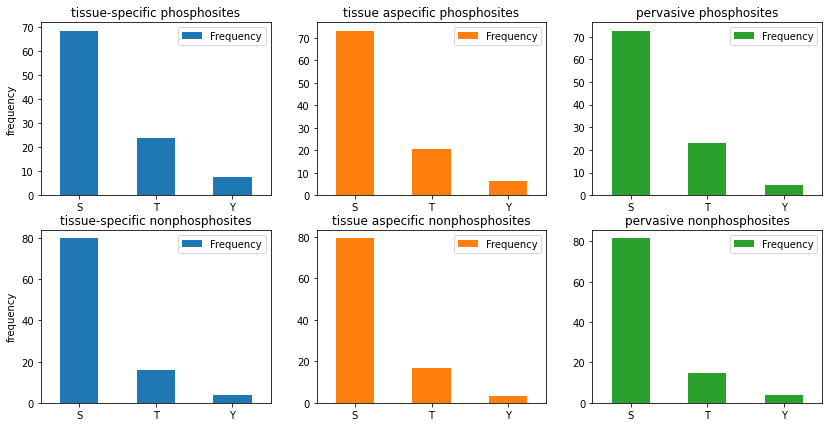

In [176]:
fig,ax = plt.subplots(2,3)

tspec_sites_Psites_plotSTY.plot(ax = ax[0,0], kind = 'bar', x="residue", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific phosphosites")
taspec_sites_Psites_plotSTY.plot(ax = ax[0,1], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific phosphosites")
gen_sites_Psites_plotSTY.plot(ax = ax[0,2], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive phosphosites")
tspec_sites_nonPsites_plotSTY.plot(ax = ax[1,0], kind = 'bar', x="residue", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific nonphosphosites")
taspec_sites_nonPsites_plotSTY.plot(ax = ax[1,1], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific nonphosphosites")
gen_sites_nonPsites_plotSTY.plot(ax = ax[1,2], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive nonphosphosites")


#plt.savefig("TCGA_Comparison of frequency STY.png", format="png", bbox_inches="tight")
plt.show()

In [177]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Polyphen_imp"].value_counts())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Polyphen_imp"].value_counts())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites["Polyphen_imp"].value_counts())

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Polyphen_imp"].value_counts())
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Polyphen_imp"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Polyphen_imp"].value_counts())

tspec_sites mutated Psite region
7536
benign               3710
probably_damaging    2440
possibly_damaging    1386
Name: Polyphen_imp, dtype: int64
taspec_sites mutated Psite region
3515
benign               1717
probably_damaging    1154
possibly_damaging     642
unknown                 2
Name: Polyphen_imp, dtype: int64
pervasively_sites mutated Psite region
2028
benign               925
probably_damaging    710
possibly_damaging    393
Name: Polyphen_imp, dtype: int64
tspec_sites mutated nonPsite region
24901
benign               12497
probably_damaging     7869
possibly_damaging     4519
unknown                 16
Name: Polyphen_imp, dtype: int64
taspec_sites mutated nonPsite region
10944
benign               5580
probably_damaging    3358
possibly_damaging    2002
unknown                 3
Name: Polyphen_imp, dtype: int64
pervasively_sites mutated nonPsite region
7836
benign               3564
probably_damaging    2772
possibly_damaging    1498
unknown                 2
Name: Pol

In [178]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites.shape[0])
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_Psites.shape[0])
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites.shape[0])
print(gen_sites_Psites["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites.shape[0])
print(gen_sites_Psites["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites.shape[0])

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/tspec_sites_nonPsites.shape[0])
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_nonPsites.shape[0])
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/gen_sites_nonPsites.shape[0])

tspec_sites mutated Psite region
49.23036093418259
32.37791932059448
18.39171974522293
taspec_sites mutated Psite region
48.847795163584635
32.83072546230441
18.26458036984353
0.05689900426742532
pervasively_sites mutated Psite region
45.61143984220907
35.009861932938854
19.37869822485207
tspec_sites mutated nonPsite region
50.18673948837396
31.601140516445124
18.147865547568372
0.06425444761254569
taspec_sites mutated nonPsite region
50.98684210526316
30.683479532163744
18.29312865497076
0.027412280701754384
pervasively_sites mutated nonPsite region
45.48238897396631
35.37519142419602
19.116896375701888
0.025523226135783564


In [179]:
tspec_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
tspec_sites_Psites_plotcons["Frequency"] =  [tspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites.shape[0], 0]
taspec_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
taspec_sites_Psites_plotcons["Frequency"] = [taspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites.shape[0],
                                            taspec_sites_Psites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_Psites.shape[0]]
gen_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
gen_sites_Psites_plotcons["Frequency"] = [gen_sites_Psites["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites.shape[0], 0]

tspec_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
tspec_sites_nonPsites_plotcons["Frequency"] =  [tspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0],
                                               tspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/tspec_sites_nonPsites.shape[0]]
taspec_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
taspec_sites_nonPsites_plotcons["Frequency"] = [taspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0],
                                               taspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_nonPsites.shape[0]]
gen_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Prob damaging","Pos damaging", "Unknown"]})
gen_sites_nonPsites_plotcons["Frequency"] = [gen_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites.shape[0],
                                            gen_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/gen_sites_nonPsites.shape[0]]

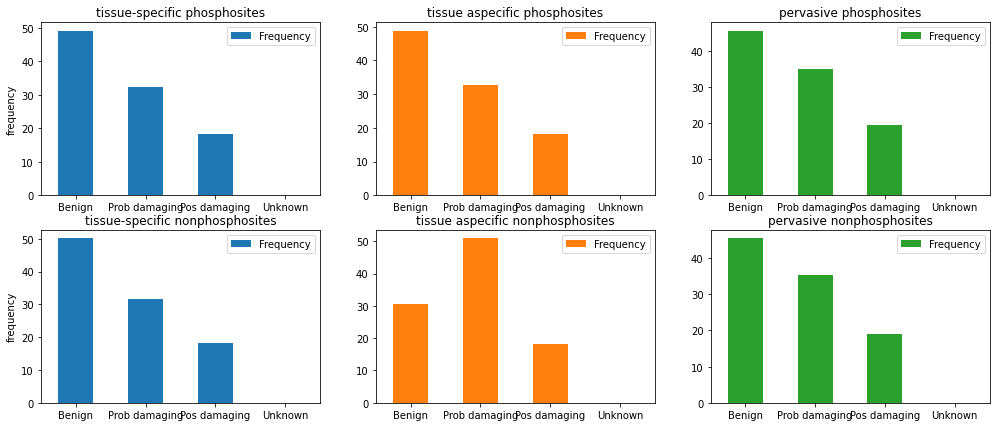

In [180]:
fig,ax = plt.subplots(2,3)

tspec_sites_Psites_plotcons.plot(ax = ax[0,0], kind = 'bar', x="Category", xlabel="", ylabel = 'frequency', figsize=(17, 7), rot=0).set_title("tissue-specific phosphosites")
taspec_sites_Psites_plotcons.plot(ax = ax[0,1], kind = 'bar', x="Category", xlabel="", figsize=(17, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific phosphosites")
gen_sites_Psites_plotcons.plot(ax = ax[0,2], kind = 'bar', x="Category", xlabel="", figsize=(17, 7), rot=0, color=["tab:green"]).set_title("pervasive phosphosites")
tspec_sites_nonPsites_plotcons.plot(ax = ax[1,0], kind = 'bar', x="Category", xlabel="", ylabel = 'frequency', figsize=(17, 7), rot=0).set_title("tissue-specific nonphosphosites")
taspec_sites_nonPsites_plotcons.plot(ax = ax[1,1], kind = 'bar', x="Category", xlabel="", figsize=(17, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific nonphosphosites")
gen_sites_nonPsites_plotcons.plot(ax = ax[1,2], kind = 'bar', x="Category", xlabel="", figsize=(17, 7), rot=0, color=["tab:green"]).set_title("pervasive nonphosphosites")

#plt.savefig("TCGA_Comparison of frequency of annot.png", format="png", bbox_inches="tight")
plt.show()

In [181]:
print("tspec_sites mutated Psite region, per residue")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites.shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts())
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts())
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts())

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts())
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts())
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts())

tspec_sites mutated Psite region, per residue
7536
benign               2638
probably_damaging    1572
possibly_damaging     952
Name: Polyphen_imp, dtype: int64
benign               856
probably_damaging    628
possibly_damaging    317
Name: Polyphen_imp, dtype: int64
probably_damaging    240
benign               216
possibly_damaging    117
Name: Polyphen_imp, dtype: int64
taspec_sites mutated Psite region
3515
benign               1289
probably_damaging     786
possibly_damaging     461
unknown                 1
Name: Polyphen_imp, dtype: int64
benign               321
probably_damaging    252
possibly_damaging    136
unknown                1
Name: Polyphen_imp, dtype: int64
probably_damaging    116
benign               107
possibly_damaging     45
Name: Polyphen_imp, dtype: int64
pervasively_sites mutated Psite region
2028
benign               692
probably_damaging    499
possibly_damaging    290
Name: Polyphen_imp, dtype: int64
benign               205
probably_damaging    166
pos

In [182]:
print("tspec_sites mutated Psite region, per residue")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])

print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])

print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])


print("taspec_sites mutated Psite region")

print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])

print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])

print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])

print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])

print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])

print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])



print("tspec_sites mutated nonPsite region, per residue")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])

print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])

print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])


print("taspec_sites mutated nonPsite region")

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])

print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])

print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])

print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])

tspec_sites mutated Psite region, per residue
7536
51.10422316931422
30.45331266950794
18.44246416117784
47.52915047196002
34.86951693503609
17.601332593003885
37.696335078534034
41.8848167539267
20.418848167539267
taspec_sites mutated Psite region
50.80804099329917
30.981474182104847
18.17106819077651
35.49295774647887
45.2112676056338
19.154929577464788
39.92537313432836
43.28358208955224
16.791044776119403
pervasively_sites mutated Psite region
2028
46.72518568534774
33.693450371370695
19.581363943281566
44.85776805251641
36.32385120350109
18.818380743982495
50.0
31.11111111111111
18.88888888888889
tspec_sites mutated nonPsite region, per residue
24901
51.67497762434471
30.143204193837104
18.15624600434727
31.33265513733469
50.44324952768493
18.04970207818631
39.6551724137931
41.96804037005887
18.376787216148024
taspec_sites mutated nonPsite region
53.16775728732897
28.747769185008924
18.054729327781082
32.27665706051873
48.89529298751201
18.82804995196926
38.012762078395625
43.5733

In [183]:
list_consequences = ["B", "Prob D", "Pos D", "US"]

tspec_Psites_both = pd.DataFrame({"consequence": list_consequences})
tspec_Psites_both["all"] = [tspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites.shape[0],
                            tspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites.shape[0],
                            tspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites.shape[0],0]
tspec_Psites_both["S"] = [tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0],
                          0]

tspec_Psites_both["T"] = [tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0],
                          0]

tspec_Psites_both["Y"] = [tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0],
                          0]

taspec_Psites_both = pd.DataFrame({"consequence": list_consequences})
taspec_Psites_both["all"] = [taspec_sites_Psites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_Psites.shape[0]]
taspec_Psites_both["S"] = [taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[3]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0]]

taspec_Psites_both["T"] = [taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[3]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0]]

taspec_Psites_both["Y"] = [taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0],
                      0]

pervasive_Psites_both = pd.DataFrame({"consequence": list_consequences})
pervasive_Psites_both["all"] = [gen_sites_Psites["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites.shape[0],
                                          0]
pervasive_Psites_both["S"] = [gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0],
                              0]

pervasive_Psites_both["T"] = [gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0],0]

pervasive_Psites_both["Y"] = [gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Polyphen_imp"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0],0]
pervasive_Psites_both

,consequence,all,S,T,Y
0,B,45.611440,46.725186,44.857768,31.111111
1,Prob D,35.009862,33.693450,36.323851,50.000000
2,Pos D,19.378698,19.581364,18.818381,18.888889
3,US,0.000000,0.000000,0.000000,0.000000


In [184]:
tspec_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
tspec_nonPsites_both["all"] = [tspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0],
                               tspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0],
                               tspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0],
                              tspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/tspec_sites_nonPsites.shape[0]]
tspec_nonPsites_both["S"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0]]

tspec_nonPsites_both["T"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[3]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0]]

tspec_nonPsites_both["Y"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0],
                           0]

taspec_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
taspec_nonPsites_both["all"] = [taspec_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/taspec_sites_nonPsites.shape[0]]

taspec_nonPsites_both["S"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0]]

taspec_nonPsites_both["T"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0],
                              0]

taspec_nonPsites_both["Y"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[3]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0]]

pervasive_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
pervasive_nonPsites_both["all"] = [gen_sites_nonPsites["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites.shape[0],
                                   gen_sites_nonPsites["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites.shape[0],
                                   gen_sites_nonPsites["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites.shape[0],
                                   gen_sites_nonPsites["Polyphen_imp"].value_counts()[3]*100/gen_sites_nonPsites.shape[0]]

pervasive_nonPsites_both["S"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Polyphen_imp"].value_counts()[3]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0]]

pervasive_nonPsites_both["T"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0],
                                 0]

pervasive_nonPsites_both["Y"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Polyphen_imp"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0],
                                 0]
pervasive_nonPsites_both

,consequence,all,S,T,Y
0,B,45.482389,47.484953,38.397790,34.461538
1,Prob D,35.375191,32.115219,44.632991,46.923077
2,Pos D,19.116896,20.356836,16.969219,18.615385
3,US,0.025523,0.042992,0.000000,0.000000


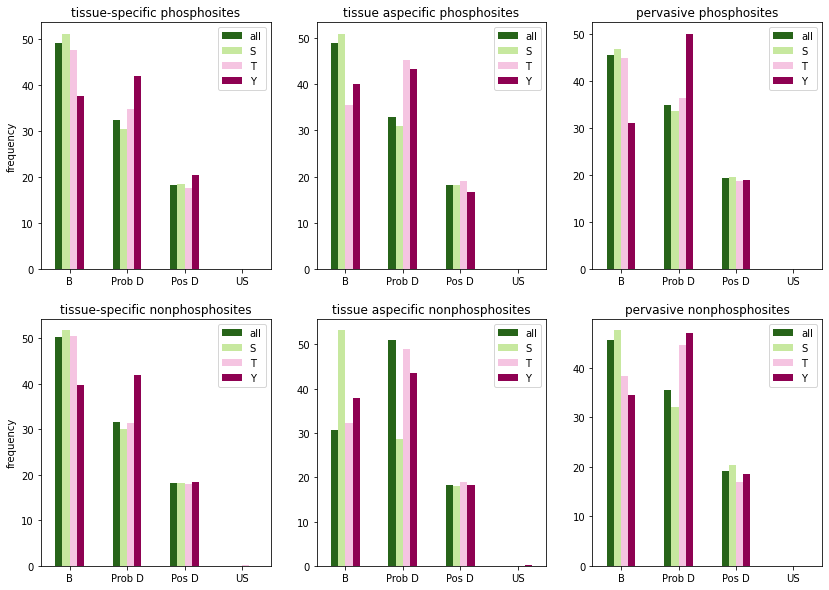

In [185]:
fig,ax = plt.subplots(2,3)

tspec_Psites_both.plot(ax = ax[0,0], kind = 'bar', x="consequence", xlabel="", ylabel = 'frequency', figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue-specific phosphosites")
taspec_Psites_both.plot(ax = ax[0,1], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue aspecific phosphosites")
pervasive_Psites_both.plot(ax = ax[0,2], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("pervasive phosphosites")
tspec_nonPsites_both.plot(ax = ax[1,0], kind = 'bar', x="consequence", xlabel="", ylabel = 'frequency', figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue-specific nonphosphosites")
taspec_nonPsites_both.plot(ax = ax[1,1], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue aspecific nonphosphosites")
pervasive_nonPsites_both.plot(ax = ax[1,2], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("pervasive nonphosphosites")


#plt.savefig("TCGA_comparison STY-annot.png", format="png", bbox_inches="tight")
plt.show()